***Loading files***

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#!/usr/bin/env python
import sys, math
import matplotlib.pyplot as plt
import numpy as np
import glob
import random

import aux
import data_classes as dc
import myplot as mypl
import physics as ph

import multiprocessing as mp

In [3]:
inputpath = aux.COMMON_INPUT_PATH
outputpath = aux.COMMON_OUTPUT_PATH
dirLabel = mypl.dirLabel
muondatapath = aux.MUON_DATA_PATH

In [4]:
massLabels = [r"$m_a=50\,$MeV",r"$m_a=300\,$MeV",r"$m_a=1\,$GeV",r"$m_a=2\,$GeV",r"$m_a=3\,$GeV",
            r"$m_a=10\,$GeV",r"$m_a=20\,$GeV",r"$m_a=30\,$GeV",r"$m_a=50\,$GeV",r"$m_a=100\,$GeV"]
masses = [0.05,0.3,1,2,3,10,20,30,50,100]


intlumi = 150 #fb-1
intlumi = intlumi*1000 #pb-1
# 1 fb = 0.001 pb -> 1 fb-1 = 1000 pb-1

# cross-sections in pb
cross_incl = [0.08800288, 0.0878576, 0.0923017, 0.09592004, 0.09589373000000001, 0.09378335999999998, 0.08844931999999998, 0.08216535999999999, 0.06951777000000002, 0.04509247499999999]
cross_boost = [0.0008085116, 0.0008088753, 0.0008235391, 0.0008374581999999999, 0.0008352221000000001, 0.0008106519, 0.0007637739, 0.0007116687000000001, 0.0006169515000000001, 0.00043018916]
cross_bkg = [0.017120891, 0.01883237, 0.02008674, 0.022096349999999997]
#cross_ttj = 257.988865 #10000 gen events
#cross_ttj = 259.029465 #50000 gen events
cross_ttj = 258.866665 #100000 gen events
cross_bkg.append(cross_ttj)

N = 100000
N_ttj = 100000

cms = {"tracker": {"tl-2d": 20, "tl-z": 50, "r": 110, "z": 290, "eta": 2.4, "pT-mu": 4, "min_disp": 0.1},
       "muon": {"tl-2d": 200, "tl-z": 300, "r": 720, "z": 1050, "eta": 2.4, "pT-mu": 4, "min_disp": 0.1}}

labels_cwb = [r'inclusive $t\bar{t}$',r'boosted $t\bar{t}$']
labels_cwboth = [r'inclusive $t\bar{t}$',r'boosted $t\bar{t}$',r'background $t\bar{t}\mu\bar{\mu}$']
labels_bkg = [r'inclusive $t\bar{t}$',r'boosted $t\bar{t}$',r'background']
labels_incl_bkg = [r'inclusive $t\bar{t}$',r'background']

In [5]:
print("Reading files")
#Filenames of the lhe files we want to read in and sort them by ascending mass
filenames_inclusive=glob.glob(inputpath+"inclusive/ma*.lhe")
filenames_inclusive.sort()
filenames_inclusive.sort(key=len)

filenames_boosted=glob.glob(inputpath+"boosted/ma*.lhe")
filenames_boosted.sort()
filenames_boosted.sort(key=len)

filenames_bkg=glob.glob(inputpath+"Bkg/Bkg_*.lhe")
filenames_bkg.sort()
filenames_bkg.sort(key=len)
print("   Done")

Reading files
   Done


In [6]:
# Read inout data with multiprocessing pool object
processes_num = 6
print(f"Loading data with {processes_num} processes")
# multiprocessing pool object
pool = mp.Pool()
# pool object with number of element
pool = mp.Pool(processes=5)
# map the function to the list and pass
# function and input list as arguments

Loading data with 6 processes
/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma001000.lhe read with [alp, top, antitop, muon, antimuon] in 100000 Events, where muons generated
/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma000300.lhe read with [alp, top, antitop, muon, antimuon] in 100000 Events, where muons generated
/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma002000.lhe read with [alp, top, antitop, muon, antimuon] in 100000 Events, where muons generated
/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma003000.lhe read with [alp, top, antitop, muon, antimuon] in 100000 Events, where muons generated
/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma000050.lhe read with [alp, top, antitop, electron, antielectron] in 100000 Events, where electrons generated
/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma010000.lhe read with [alp, top, antitop, muon, antimuon] in 100000 Events, where muons generated
/eos/user/j/jalimena/TTALP/lhe_files/inclusive/ma020000.lhe read with [alp, top, a

In [7]:
data_inclusive = pool.map(dc.Dataset.from_lhe_alp, filenames_inclusive)

In [8]:
data_boosted = pool.map(dc.Dataset.from_lhe_alp, filenames_boosted)

In [9]:
data_bkg = pool.map(dc.Dataset.from_lhe_alp, filenames_bkg)

In [18]:
data_ttj = dc.Dataset.from_txt_bkg("/afs/cern.ch/user/l/lrygaard/private/madanalysis5/ALPanalysis/Output/TXT/ttj100000/muon_data.txt")

Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
-1
-1
Muon mass error, event ignored
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
-1
-1
Muon mass error, event

Muon mass error, event ignored
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
-1
-1
Muon mass error, event ignored
Event not included: 2 number of particles, 2 number of muons, 0 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuons,
Event not included: 2 number of particles, 0 number of muons, 2 number of antimuon

In [27]:
data_bkg_org = data_bkg.copy()
data_bkg.append(data_ttj)
print(data_bkg)

[This Dataset contains 100000 events., This Dataset contains 100000 events., This Dataset contains 100000 events., This Dataset contains 100000 events., This Dataset contains 1874 events.]


In [29]:
# Setting the weights for expected number of events
for i in range(len(data_inclusive)):
    data_inclusive[i].set_exp_weights(cross_incl[i], intlumi, N)
for i in range(len(data_boosted)):
    data_boosted[i].set_exp_weights(cross_boost[i], intlumi, N)
for i in range(len(data_bkg)-1):
    data_bkg[i].set_exp_weights(cross_bkg[i], intlumi, N)
data_bkg[-1].set_exp_weights(cross_bkg[-1], intlumi, N_ttj)

# Printing expected number of events
# Printing ma=1GeV for signal
data_inclusive[2].print_expected_events()
data_boosted[2].print_expected_events()
for data in data_bkg:
    data.print_expected_events()

This Dataset contains 13845.255 events.
This Dataset contains 123.530865 events.
This Dataset contains 2568.13365 events.
This Dataset contains 2824.8555 events.
This Dataset contains 3013.011 events.
This Dataset contains 3314.4524999999994 events.
This Dataset contains 727674.195315 events.


***Make a cut for |eta|<2.5***

In [30]:
# Saving original version of data before making the first cut on eta
data_inclusive_nocut = data_inclusive.copy()
data_boosted_nocut = data_boosted.copy()
data_bkg_nocut = data_bkg.copy()

In [32]:
# Make a cut for |eta|<2.5
sel = ((lambda x: abs(x)<2.5),"eta", ["muon"])
data_inclusive = [dc.Dataset.event_selection(ds,sel) for ds in data_inclusive_nocut]
data_boosted = [dc.Dataset.event_selection(ds,sel) for ds in data_boosted_nocut]
data_bkg = [dc.Dataset.event_selection(ds,sel) for ds in data_bkg_nocut]
print(data_inclusive)
print(data_boosted)
print(data_bkg)

[This Dataset contains 96377 events., This Dataset contains 96405 events., This Dataset contains 96381 events., This Dataset contains 96373 events., This Dataset contains 96401 events., This Dataset contains 96096 events., This Dataset contains 96032 events., This Dataset contains 95898 events., This Dataset contains 95850 events., This Dataset contains 96022 events.]
[This Dataset contains 97041 events., This Dataset contains 97123 events., This Dataset contains 97048 events., This Dataset contains 97083 events., This Dataset contains 97087 events., This Dataset contains 96846 events., This Dataset contains 96528 events., This Dataset contains 96513 events., This Dataset contains 96540 events., This Dataset contains 96572 events.]
[This Dataset contains 100000 events., This Dataset contains 100000 events., This Dataset contains 100000 events., This Dataset contains 94829 events., This Dataset contains 1145 events.]


In [33]:
data_inclusive_org = data_inclusive.copy()
data_boosted_org = data_boosted.copy()
data_bkg_org = data_bkg.copy()
print(data_inclusive)
print(data_boosted)
print(data_bkg)

[This Dataset contains 96377 events., This Dataset contains 96405 events., This Dataset contains 96381 events., This Dataset contains 96373 events., This Dataset contains 96401 events., This Dataset contains 96096 events., This Dataset contains 96032 events., This Dataset contains 95898 events., This Dataset contains 95850 events., This Dataset contains 96022 events.]
[This Dataset contains 97041 events., This Dataset contains 97123 events., This Dataset contains 97048 events., This Dataset contains 97083 events., This Dataset contains 97087 events., This Dataset contains 96846 events., This Dataset contains 96528 events., This Dataset contains 96513 events., This Dataset contains 96540 events., This Dataset contains 96572 events.]
[This Dataset contains 100000 events., This Dataset contains 100000 events., This Dataset contains 100000 events., This Dataset contains 94829 events., This Dataset contains 1145 events.]


In [34]:
# Printing expected number of events after eta cut
# Printing ma=1GeV for signal
data_inclusive[2].print_expected_events()
data_boosted[2].print_expected_events()
for data in data_bkg:
    data.print_expected_events()

This Dataset contains 1.0 events.
This Dataset contains 1.0 events.
This Dataset contains 1.0 events.
This Dataset contains 1.0 events.
This Dataset contains 1.0 events.
This Dataset contains 1.0 events.
This Dataset contains 1.0 events.


***Function setup***

In [35]:
def data(which, whose, where, **kwargs):
    """calculates a specific observable for a specific dataset
    
    which - the observable calculated (e.g.: "pT", "theta", "oA")
    whose - list of the particle's converned (e.g.: ["alp"], ["top", "antitop"])
    where - the dataset used (e.g. "incl"); to return only a single dataset's 
       observable data, set where = ("incl", 3) for the 4th dataset in "incl"
    additional arguments for the observable function can be placed in kwargs
    if we want the average instead of the full dataset, add average=True"""
    if where == "incl":
        return [ds.observables(which, whose, **kwargs) for ds in data_inclusive]
    elif where == "boost":
        return [ds.observables(which, whose, **kwargs) for ds in data_boosted]
    elif where == "bkg":
        return [ds.observables(which, whose, **kwargs) for ds in data_bkg]
    elif where == "ttj":
        return [data_ttj.observables(which, whose, **kwargs)]
    elif len(where)==2:
        if where[0] == "incl":
            return data_inclusive[where[1]].observables(which, whose, **kwargs)
        elif where[0] == "boost":
            return data_boosted[where[1]].observables(which, whose, **kwargs)
        elif where[0] == "bkg":
            return data_bkg[where[1]].observables(which, whose, **kwargs)
    else:
        raise ValueError(f"Dataset-List {where} not defined.")

***Plotting***

First plotting all available muon data

Different array lengths: 10, 5, 0, 10


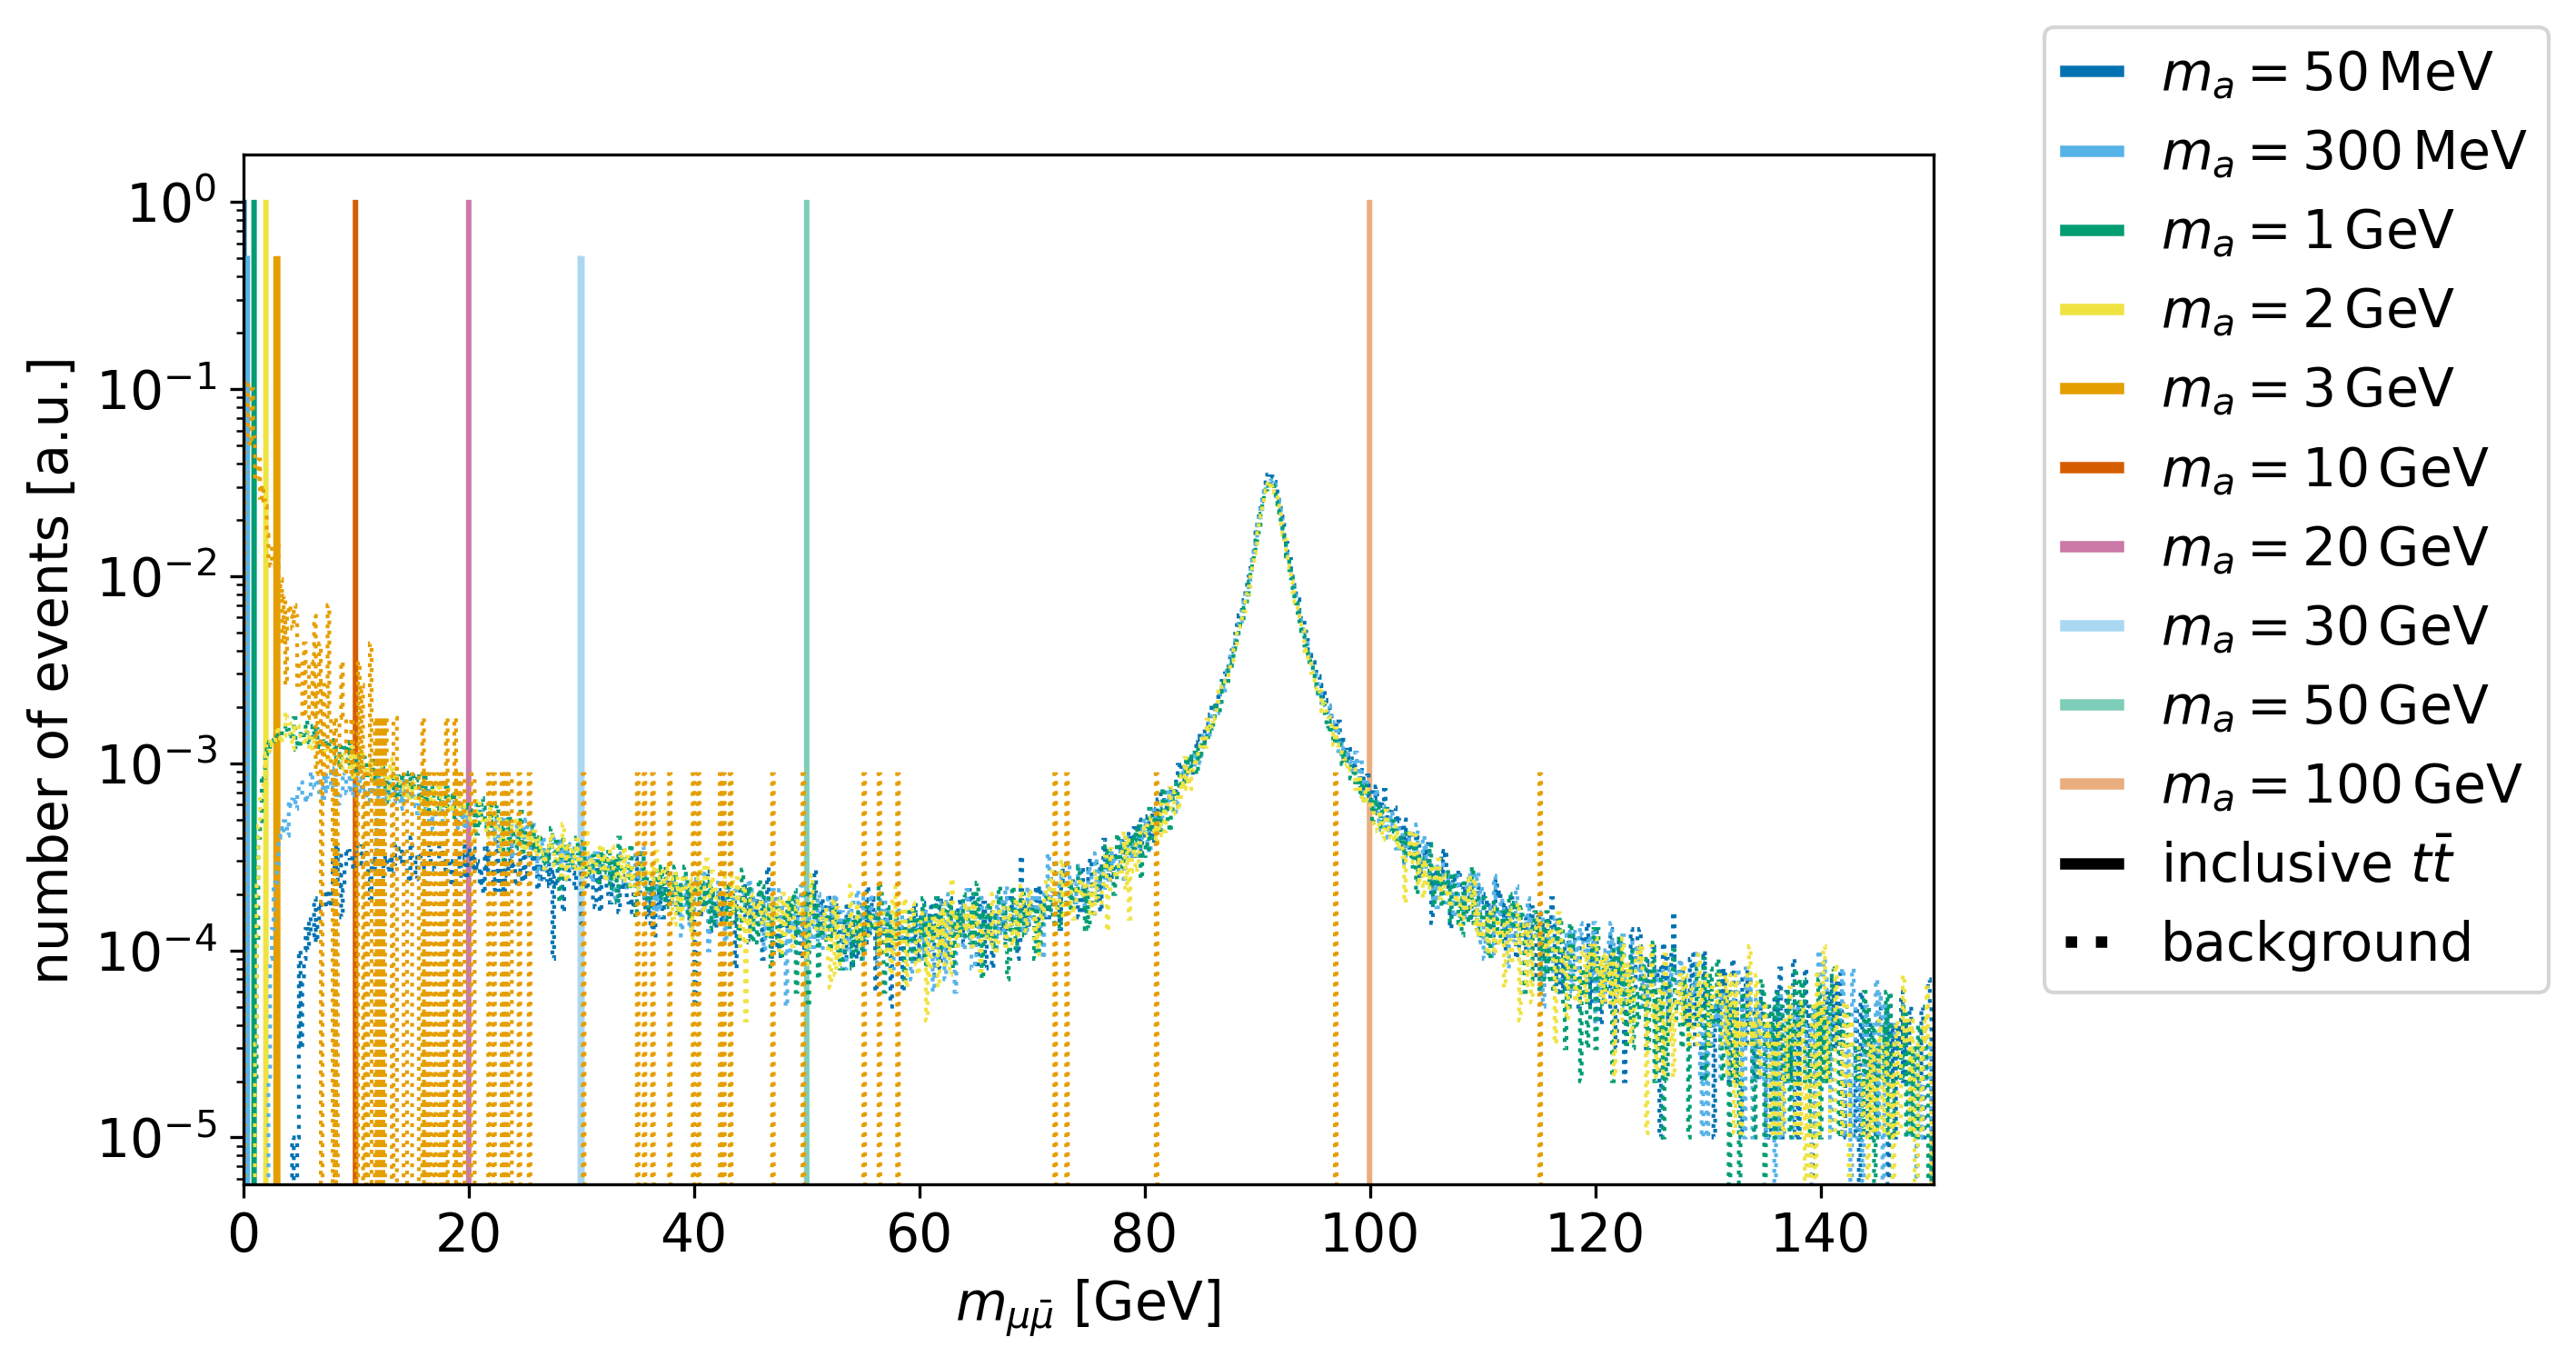

Different array lengths: 10, 5, 0, 10


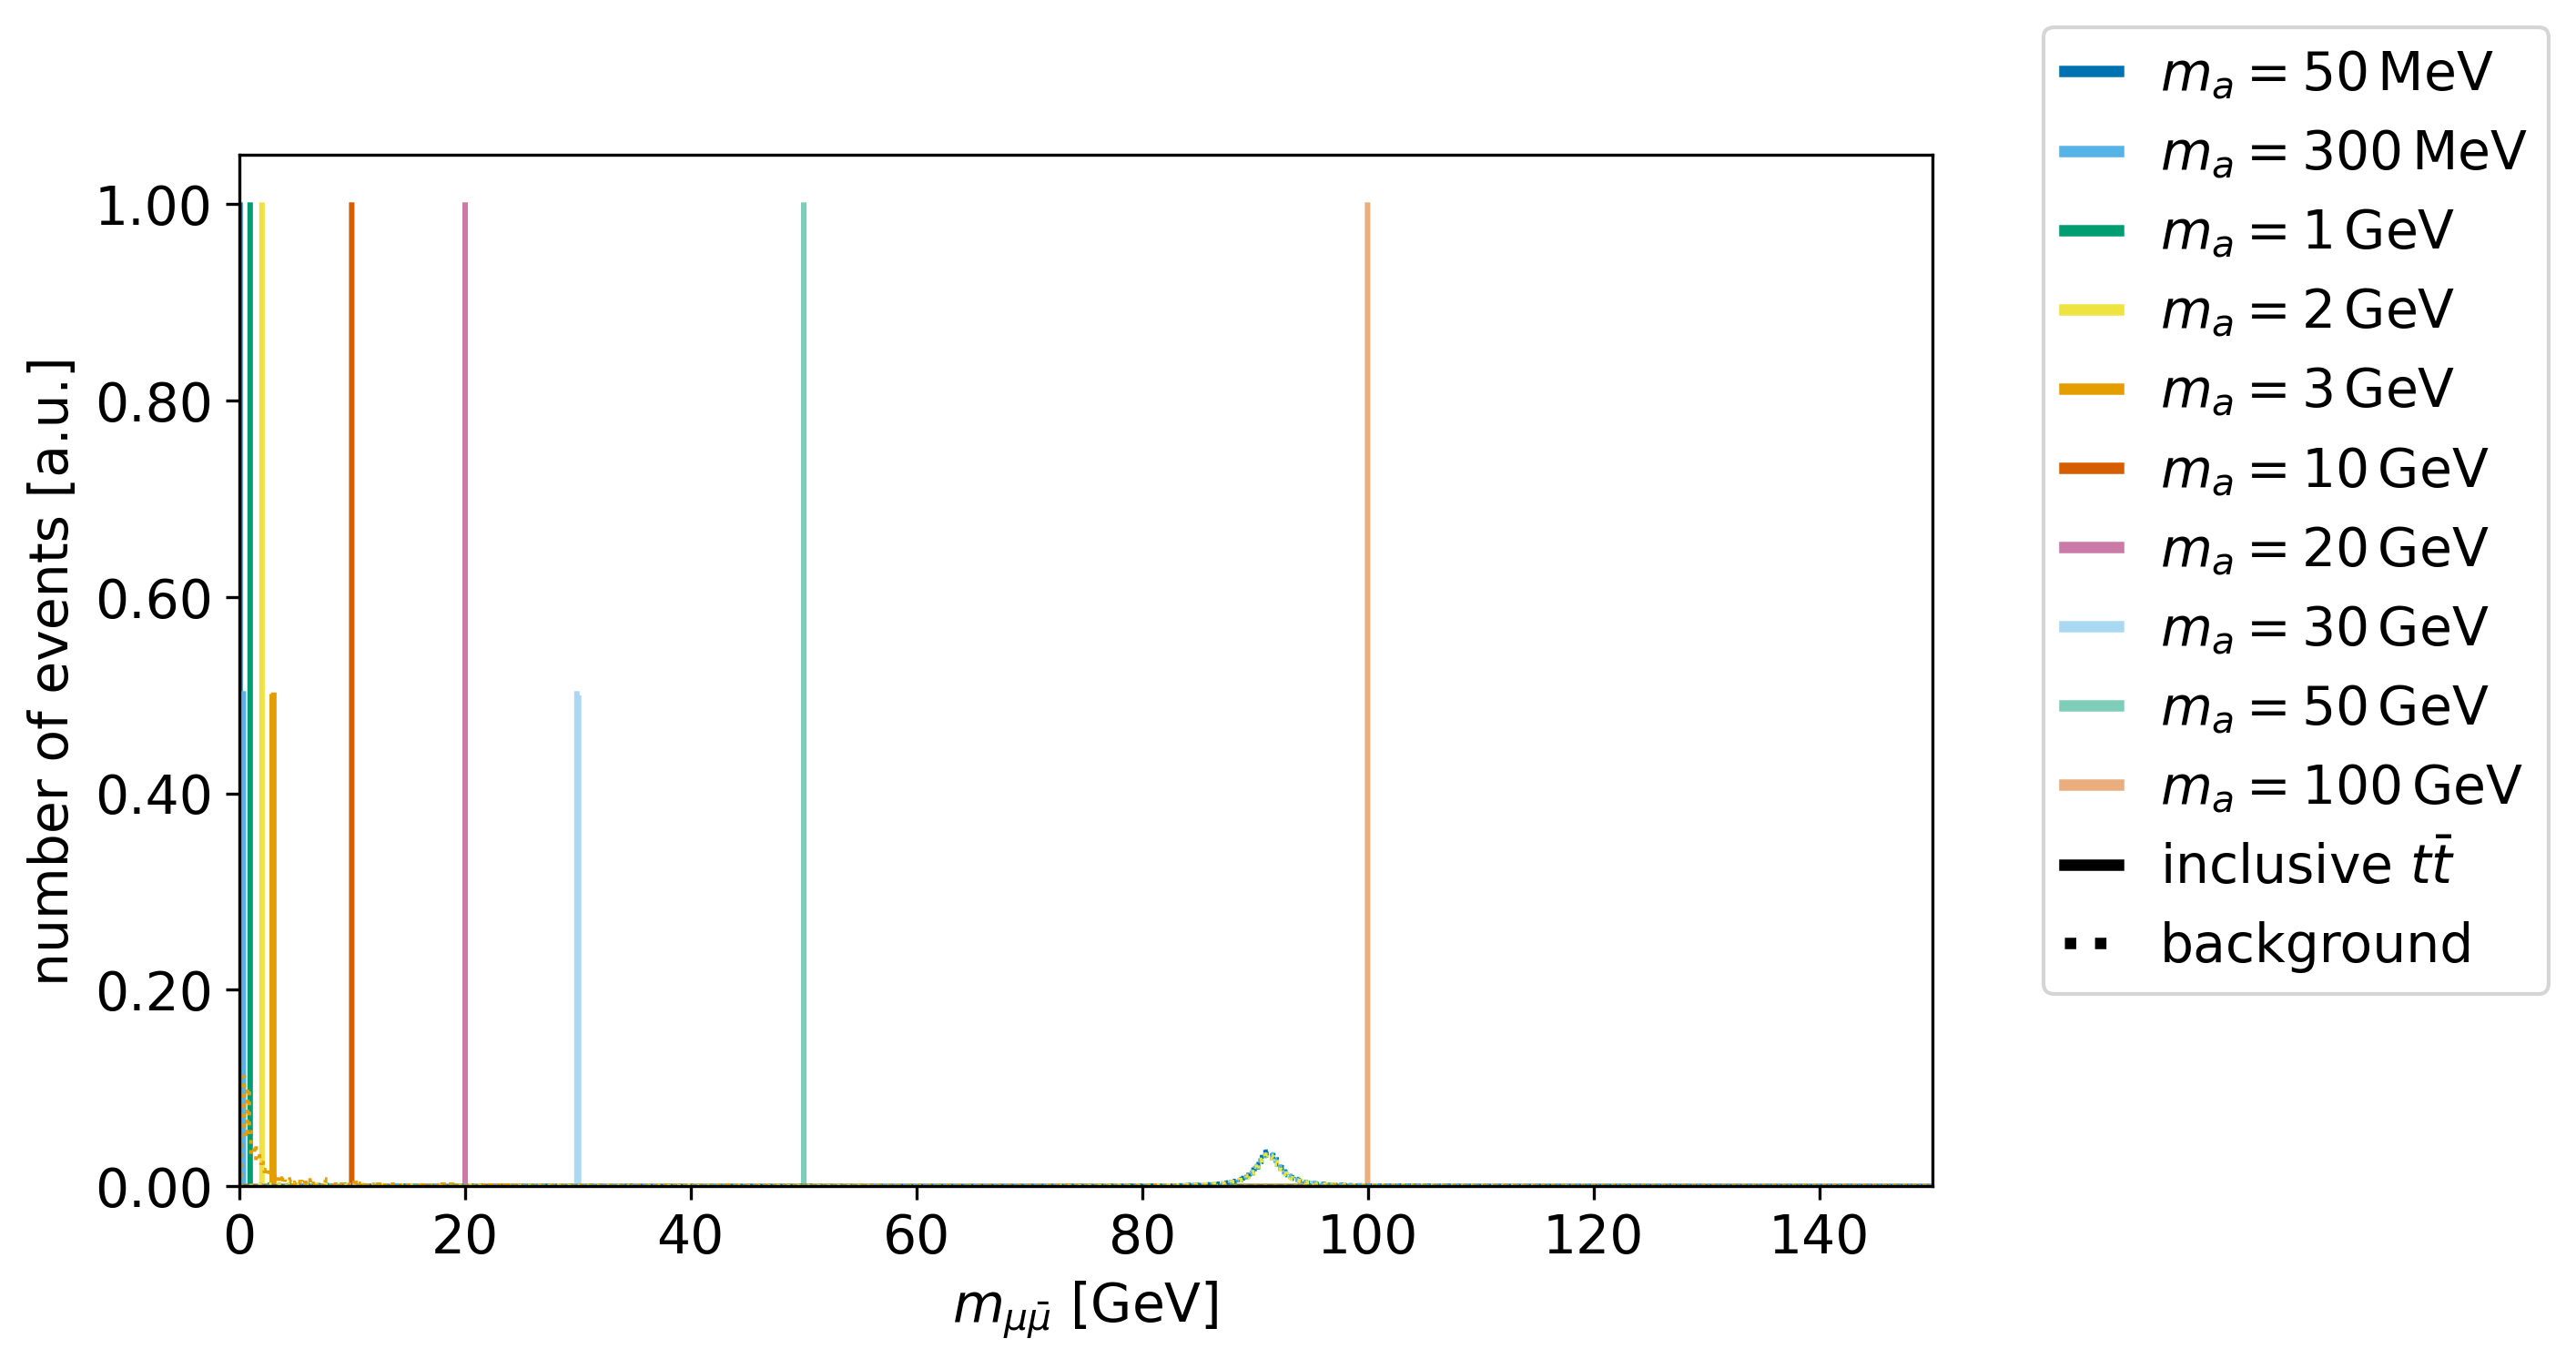

In [42]:
mypl.hist1dcomp(data("inv_mass",["antimuon","muon"],"incl"),data("inv_mass",["antimuon","muon"],"bkg"),[],massLabels,dirLabel["mmumu"],outputpath+"inv_mass_muons_cwb_log.png",customXlabels=labels_incl_bkg,nbins=1000,customXlim=[0,150],log_scale=True)
mypl.hist1dcomp(data("inv_mass",["antimuon","muon"],"incl"),data("inv_mass",["antimuon","muon"],"bkg"),[],massLabels,dirLabel["mmumu"],outputpath+"inv_mass_muons_cwb_lin.png",customXlabels=labels_incl_bkg,nbins=1000,customXlim=[0,150])


i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
0
1
2
3
4
5


IndexError: list index out of range

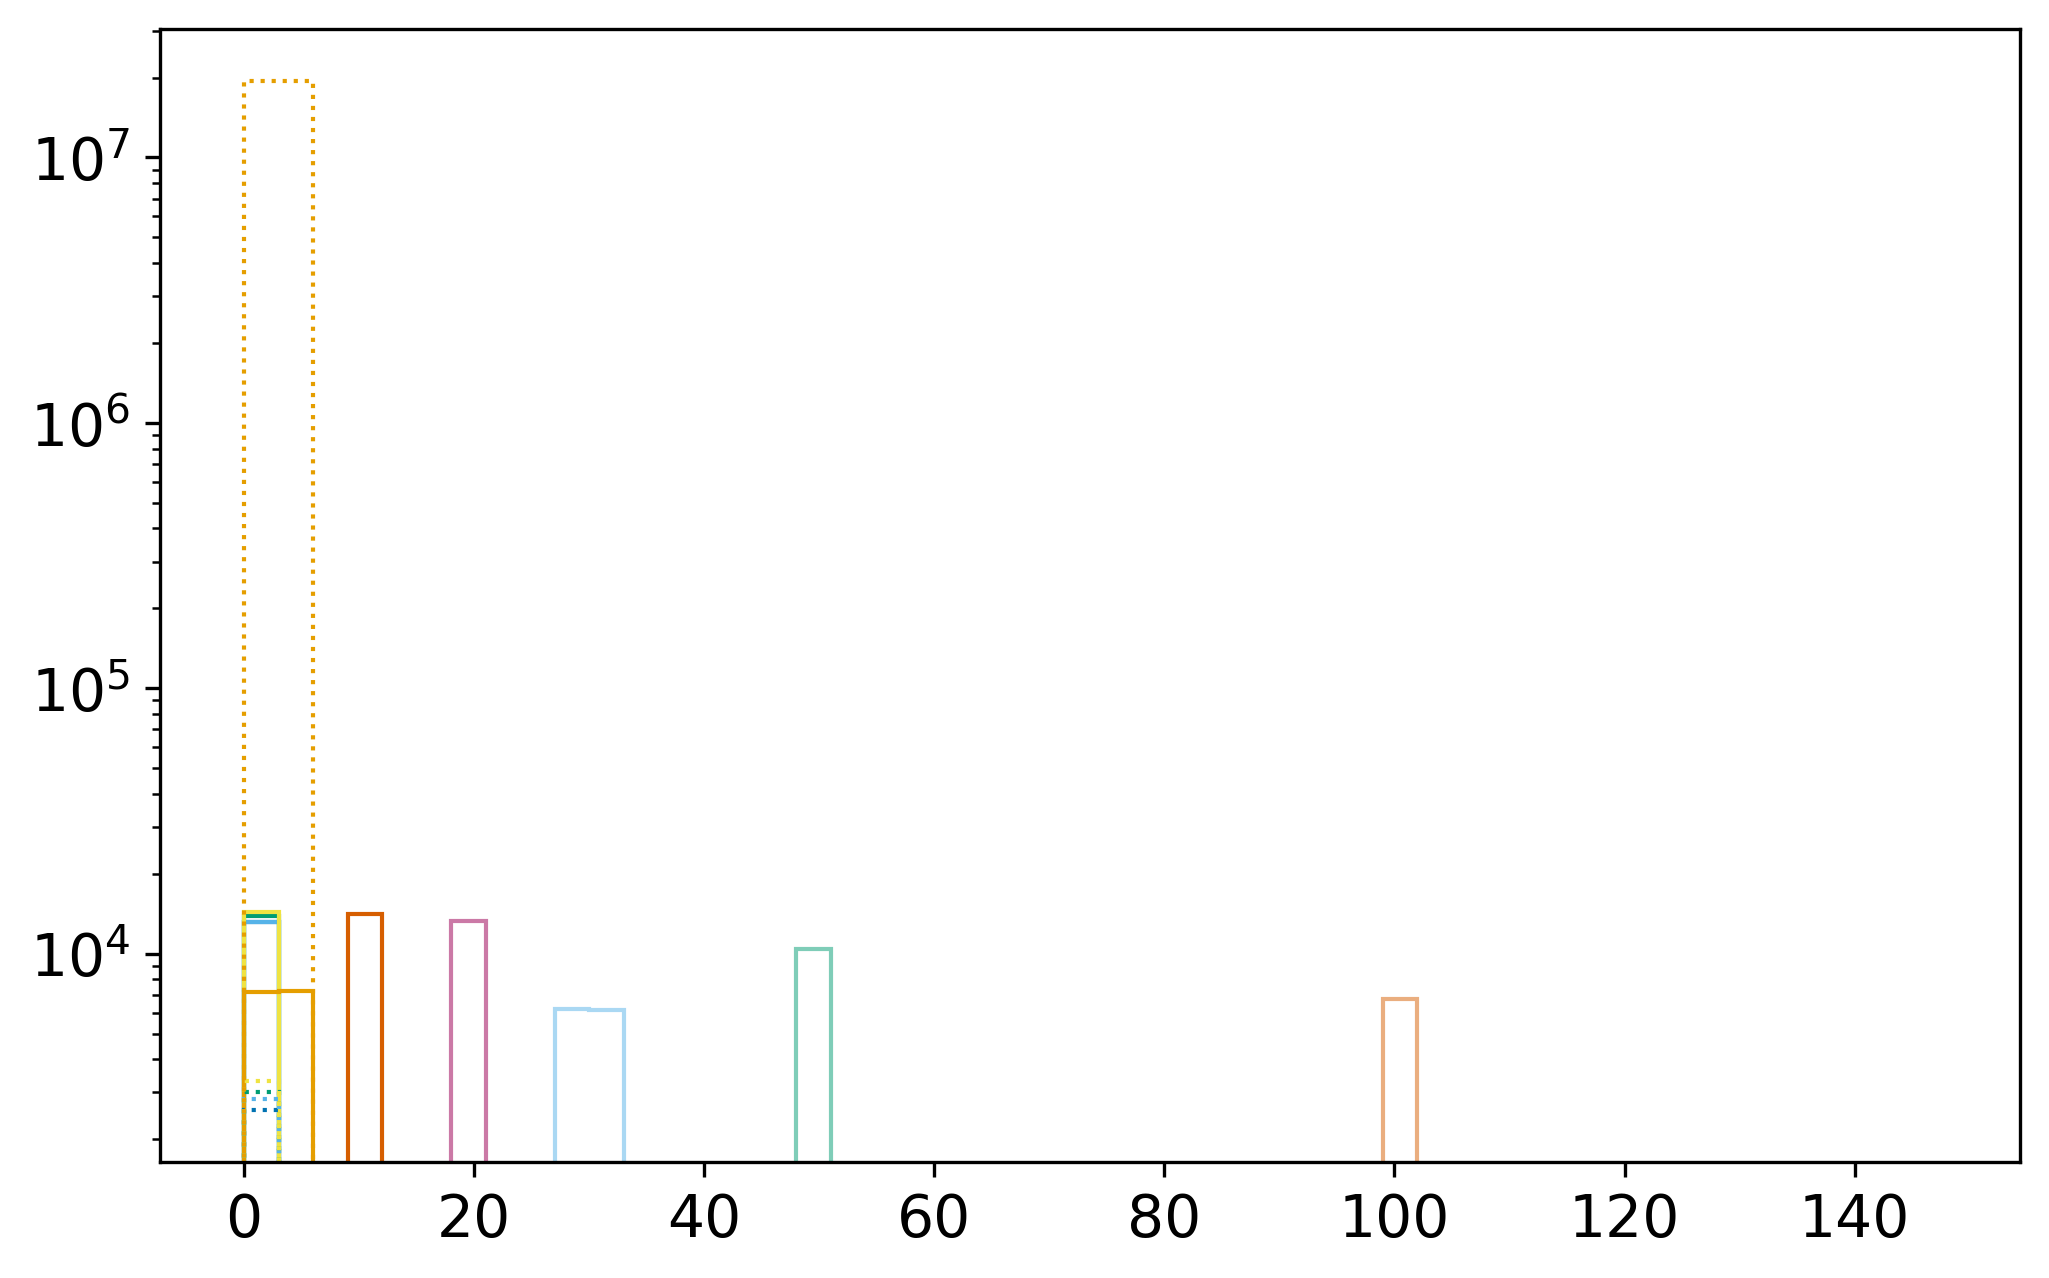

In [54]:
mypl.hist1dcross(data("inv_mass",["antimuon","muon"],"incl"),data("inv_mass",["antimuon","muon"],"incl"),[],cross_incl,cross_bkg,[],intlumi,massLabels,dirLabel["mmumu"],outputpath+"inv_mass_muons_cross_log.png",customXlim=[0,150],customXlabels=labels_incl_bkg, log_scale=True, selLabel='None')
mypl.hist1dcomp(data("inv_mass",["antimuon","muon"],"incl"),data("inv_mass",["antimuon","muon"],"bkg"),[],massLabels,dirLabel["mmumu"],outputpath+"inv_mass_muons_cwb_log.png",customXlabels=labels_incl_bkg,nbins=1000,customXlim=[0,150],log_scale=True)
mypl.hist1dcomp(data("inv_mass",["antimuon","muon"],"incl"),data("inv_mass",["antimuon","muon"],"bkg"),[],massLabels,dirLabel["mmumu"],outputpath+"inv_mass_muons_cwb_lin.png",customXlabels=labels_incl_bkg,nbins=1000,customXlim=[0,150])

mypl.hist1dcross(data("pT",["muon"],"incl"),data("pT",["muon"],"bkg"),[],cross_incl,cross_bkg,[],intlumi,massLabels,dirLabel["pT_mu"],outputpath+"Muon_pT_cross_log.png",customXlim=[0,1000],customXlabels=labels_incl_bkg, log_scale=True, selLabel='None')
mypl.hist1dcomp(data("pT",["muon"],"incl"),data("pT",["muon"],"bkg"),[],massLabels,dirLabel["pT_mu"],outputpath+"Muon_pT_cwb_lin.png",customXlim=[0,1000],customXlabels=labels_incl_bkg)
mypl.hist1dcomp(data("pT",["muon"],"incl"),data("pT",["muon"],"bkg"),[],massLabels,dirLabel["pT_mu"],outputpath+"Muon_pT_cwb_log.png",customXlim=[0,1000],customXlabels=labels_incl_bkg,log_scale=True)

mypl.hist1dcross(data("eta",["muon"],"incl"),data("eta",["muon"],"bkg"),[],cross_incl,cross_bkg,[],intlumi,massLabels,dirLabel["eta_mu"],outputpath+"Muon_pseudorapidity_cwb.png",customXlabels=labels_incl_bkg, customXlim=[-10,10],log_scale=True)
mypl.hist1dcomp(data("eta",["muon"],"incl"),data("eta",["muon"],"bkg"),[],massLabels,dirLabel["eta_mu"],outputpath+"Muon_pseudorapidity_cwb.png",customXlabels=labels_incl_bkg, customXlim=[-8,8])
mypl.hist1dcomp(data("eta",["muon"],"incl"),data("eta",["muon"],"bkg"),[],massLabels,dirLabel["eta_mu"],outputpath+"Muon_pseudorapidity_cwb_log.png",customXlabels=labels_incl_bkg, customXlim=[-8,8], log_scale=True)

mypl.hist1dcross(data("oA",["antimuon","muon"],"incl"),data("oA",["antimuon","muon"],"bkg"),[],cross_incl,cross_bkg,[],intlumi,massLabels,dirLabel["oA_muons"],outputpath+"Angle_Muons_cross_log.png",customXlabels=labels_incl_bkg, log_scale=True)
mypl.hist1dcomp(data("oA",["antimuon","muon"],"incl"),data("oA",["antimuon","muon"],"bkg"),[],massLabels,dirLabel["oA_muons"],outputpath+"Angle_Muons_cwb_lin.png",customXlabels=labels_incl_bkg, log_scale = False)
mypl.hist1dcomp(data("oA",["antimuon","muon"],"incl"),data("oA",["antimuon","muon"],"bkg"),[],massLabels,dirLabel["oA_muons"],outputpath+"Angle_Muons_cwb_log.png",customXlabels=labels_incl_bkg, log_scale = True)

mypl.hist1dcross(data("y",["muon"],"incl"),data("y",["muon"],"bkg"),[],cross_incl,cross_bkg,[],intlumi,massLabels,dirLabel["y_mu"],outputpath+"Muon_rapidity_cross_log.png",customXlabels=labels_incl_bkg, log_scale=True)
mypl.hist1dcomp(data("y",["muon"],"incl"),data("y",["muon"],"bkg"),[],massLabels,dirLabel["y_mu"],outputpath+"Muon_rapidity_cwb_lin.png",customXlabels=labels_incl_bkg, log_scale = False)
mypl.hist1dcomp(data("y",["muon"],"incl"),data("y",["muon"],"bkg"),[],massLabels,dirLabel["y_mu"],outputpath+"Muon_rapidity_cwb_log.png",customXlabels=labels_incl_bkg, log_scale = True)


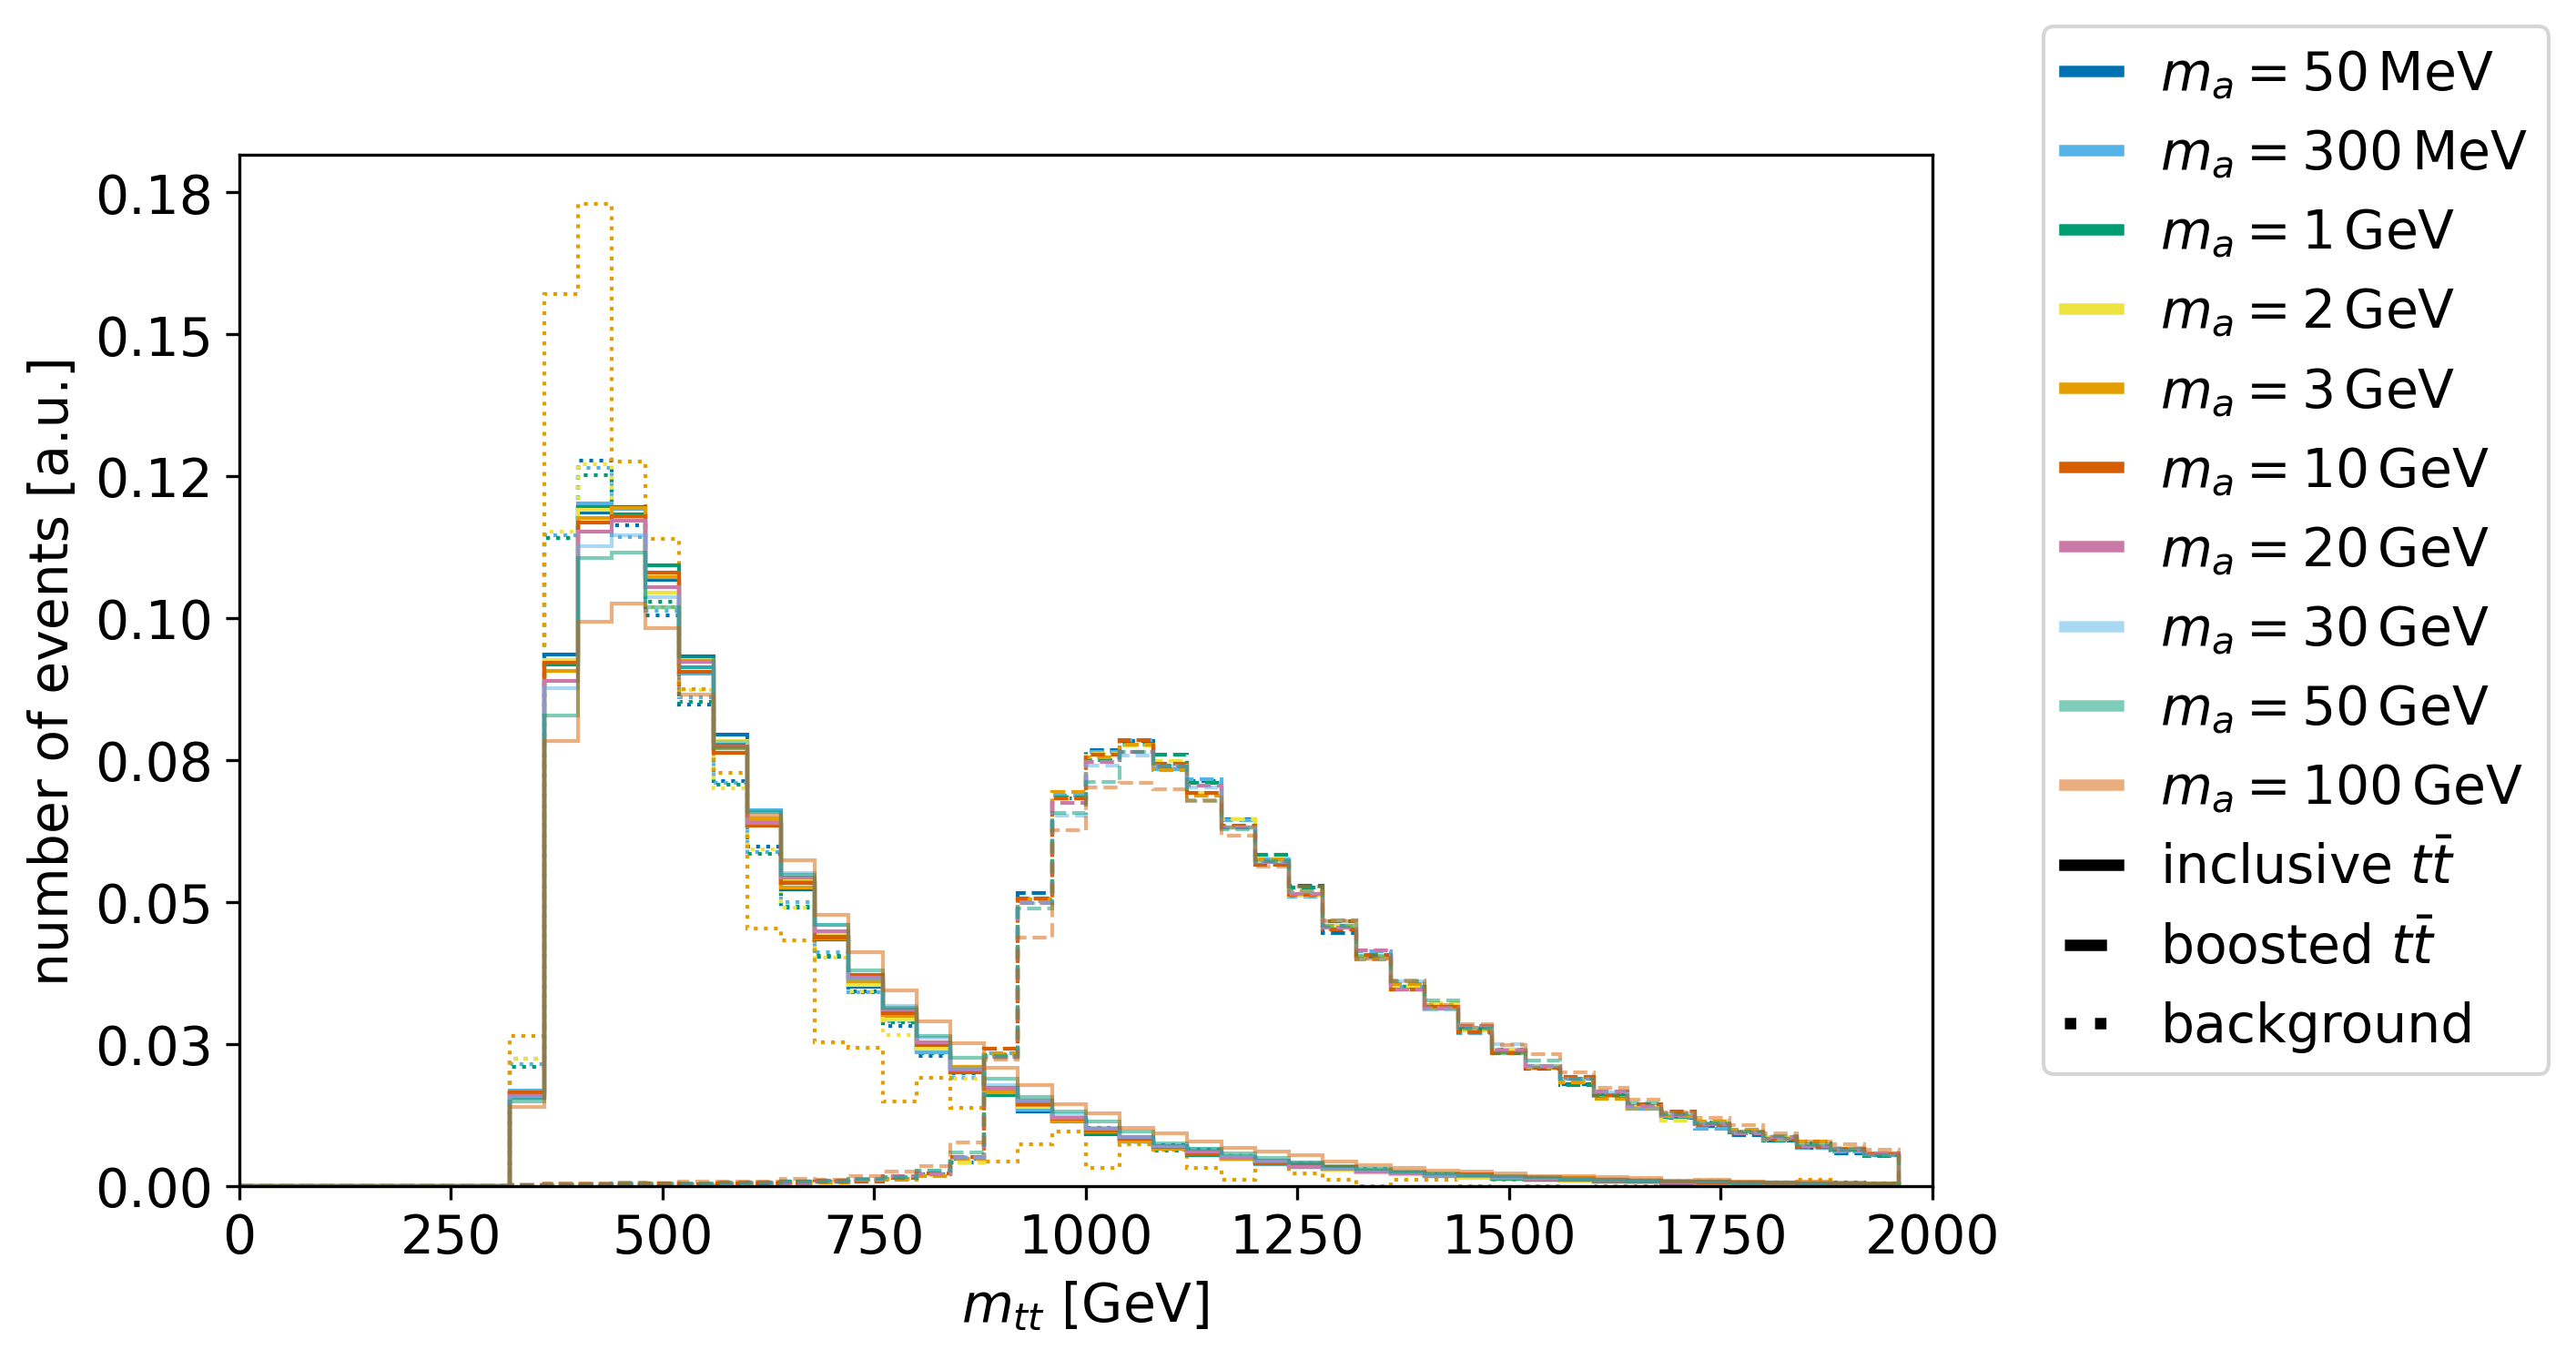

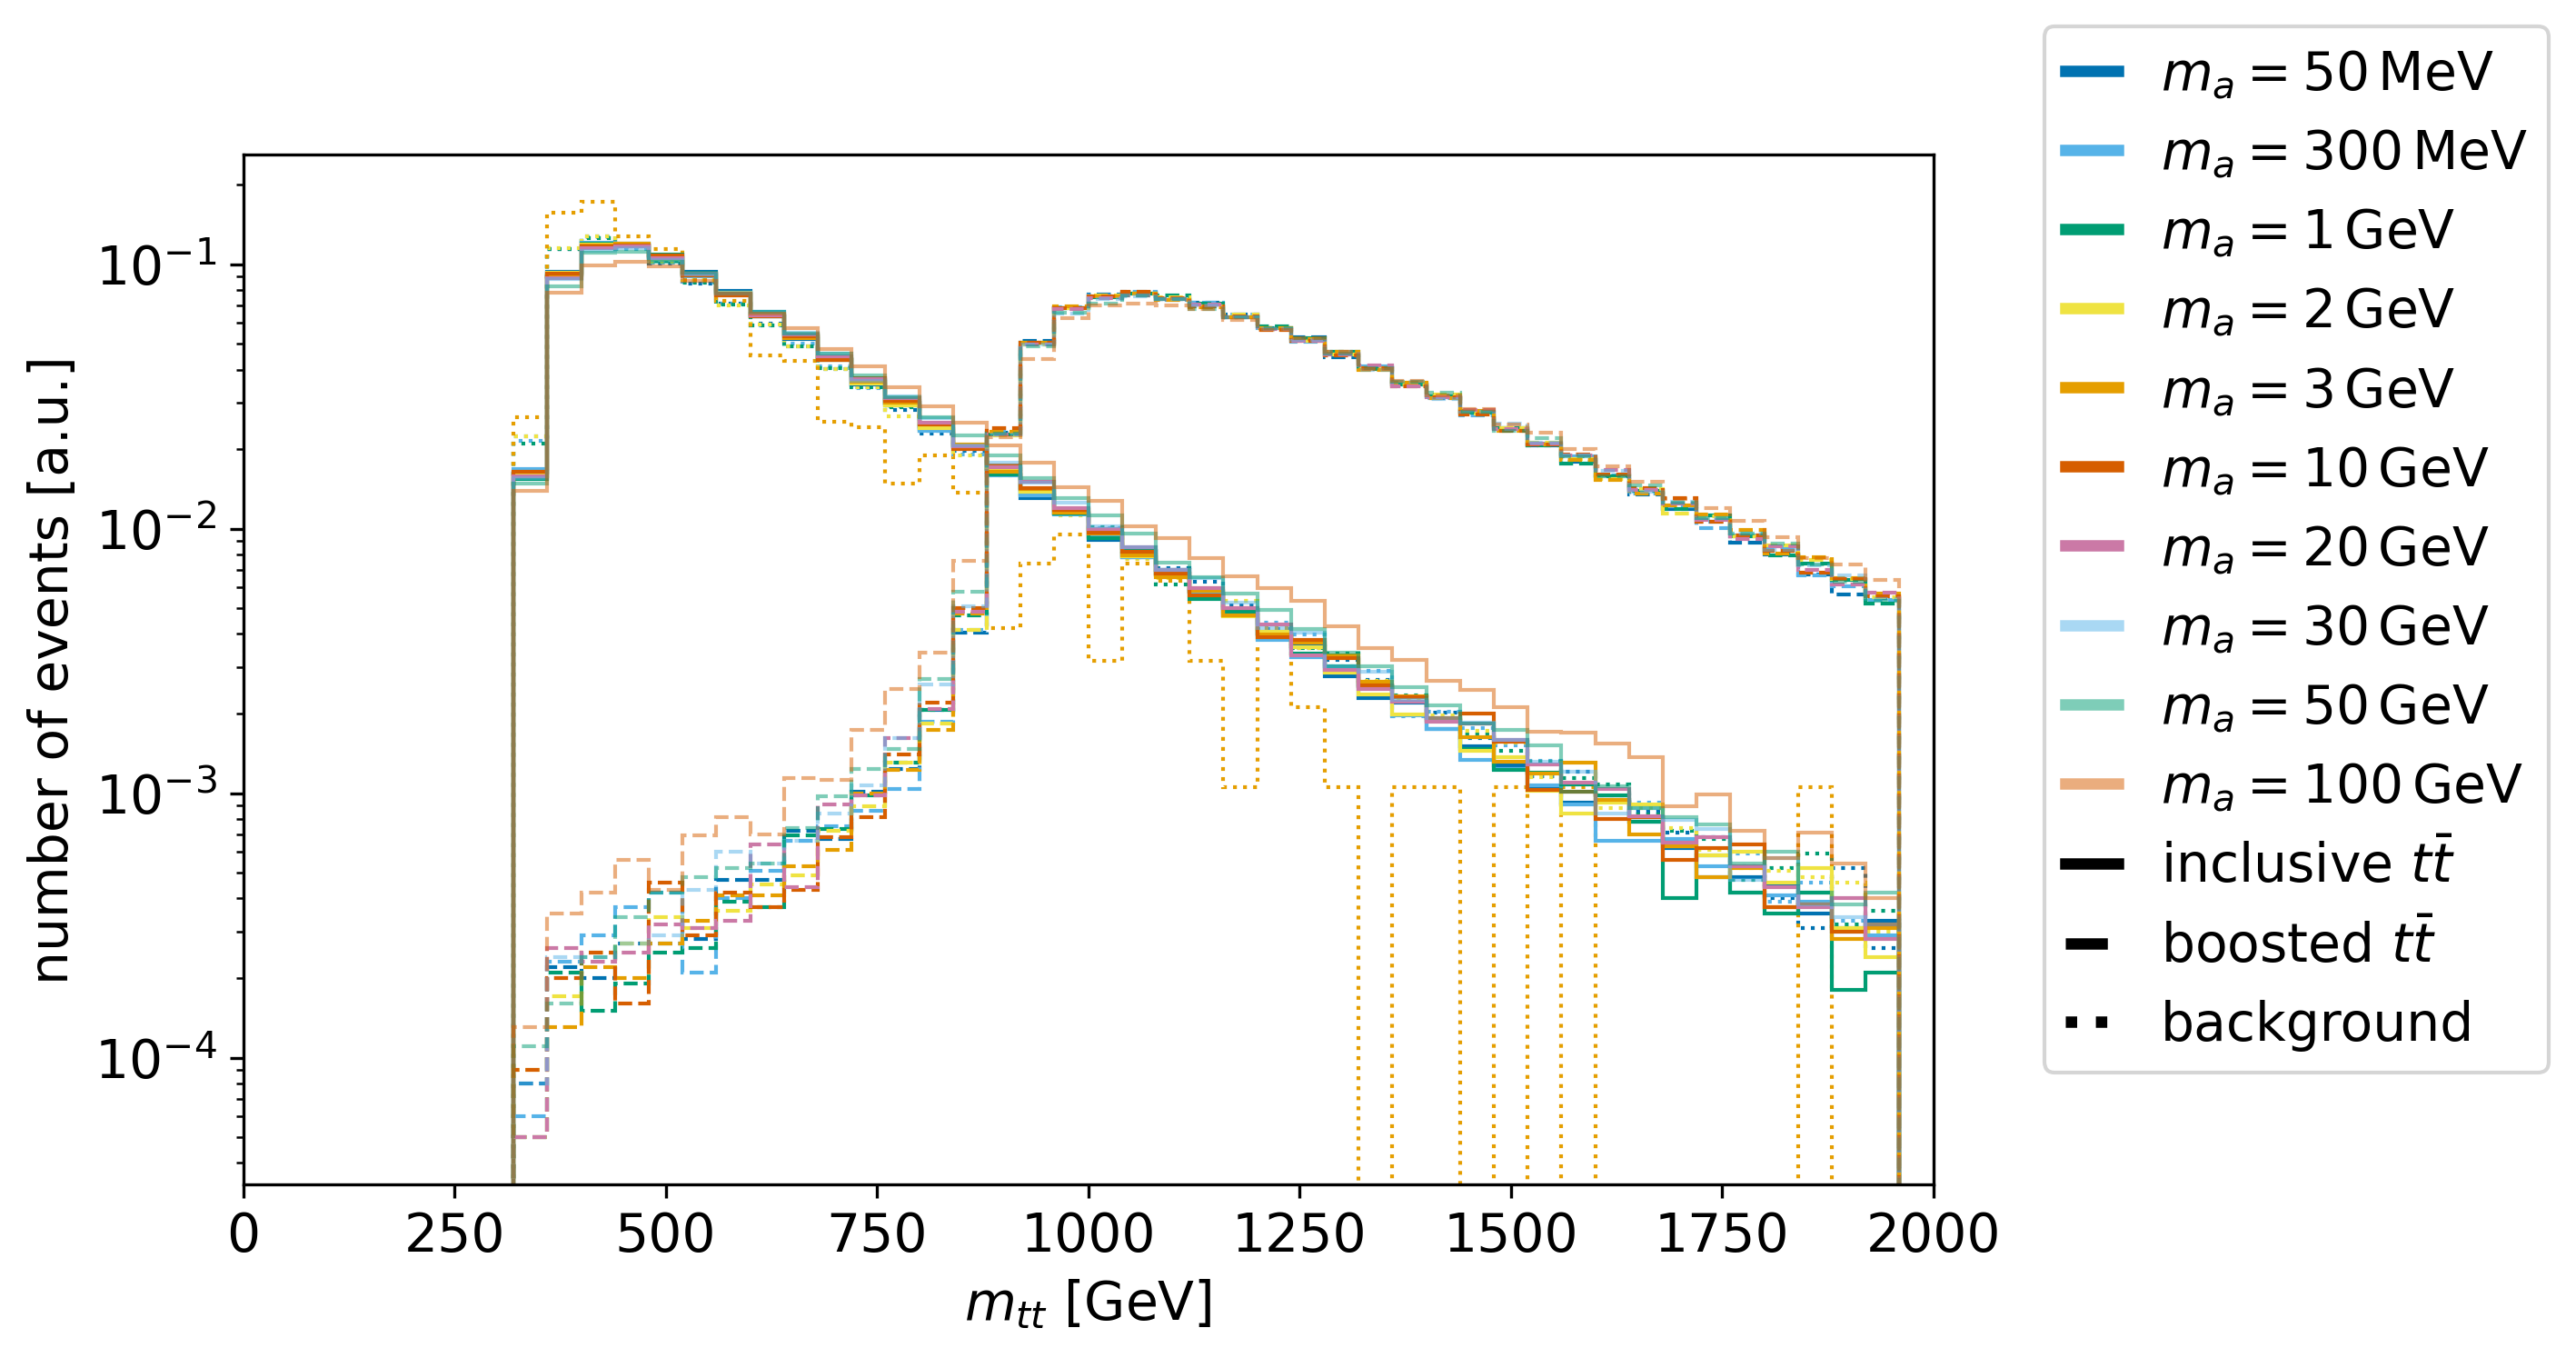

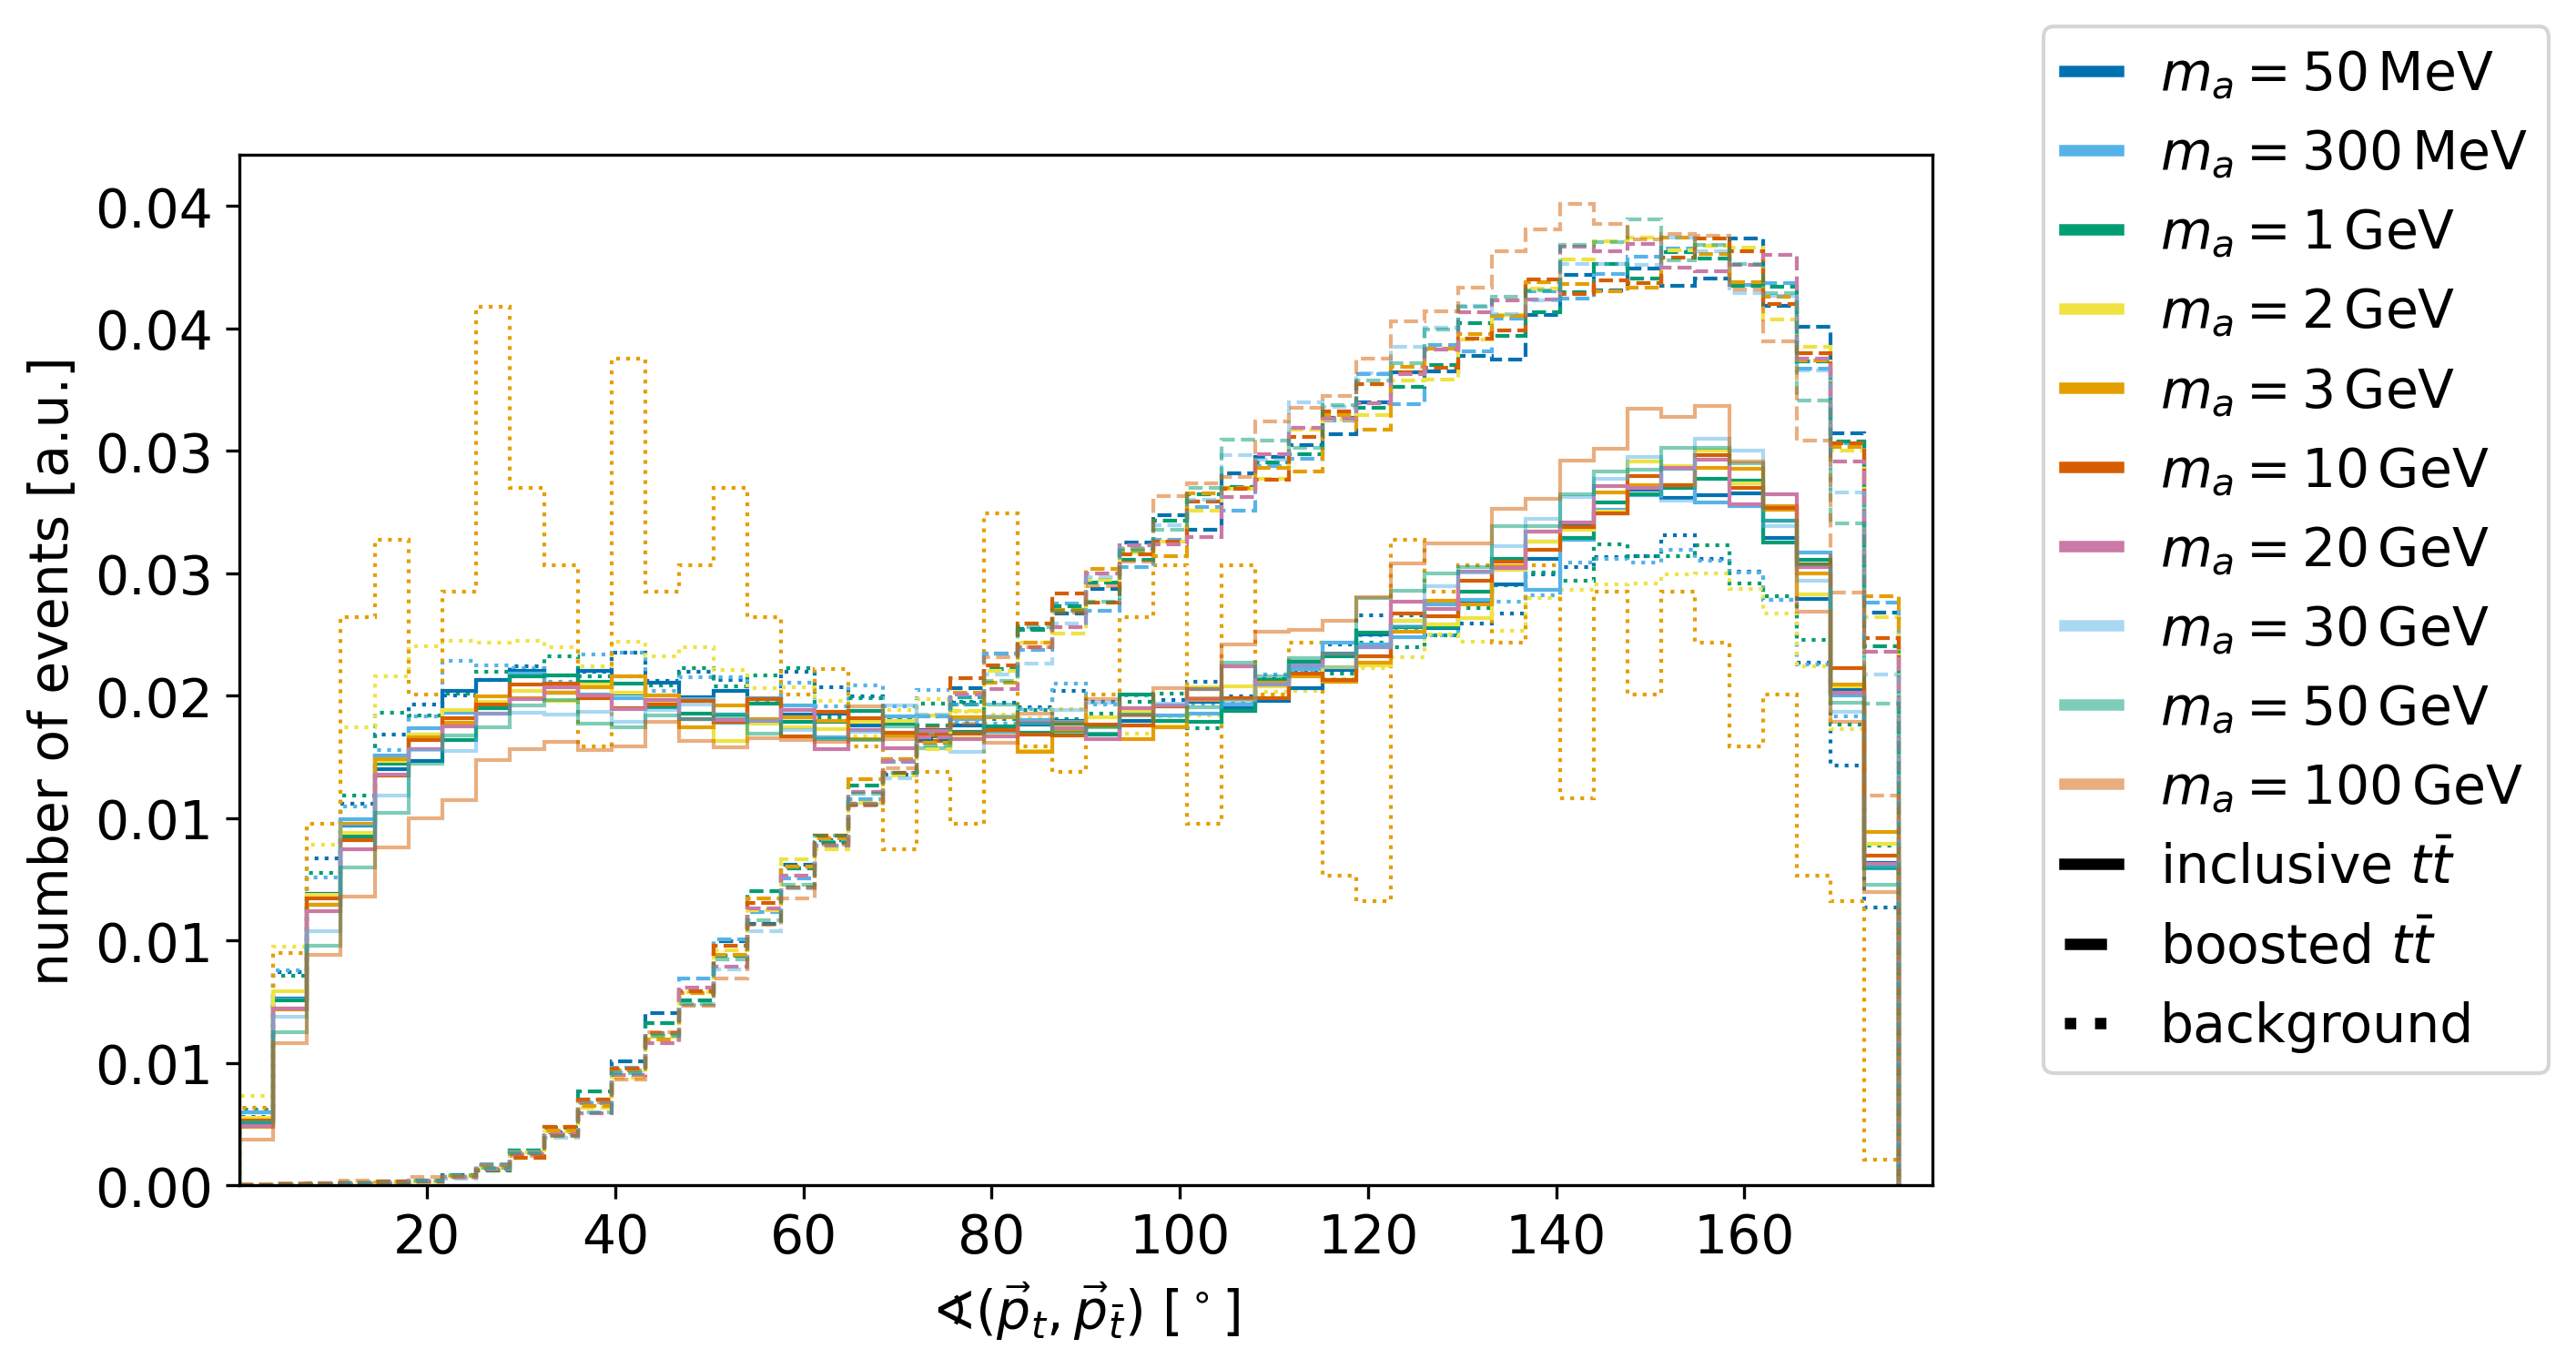

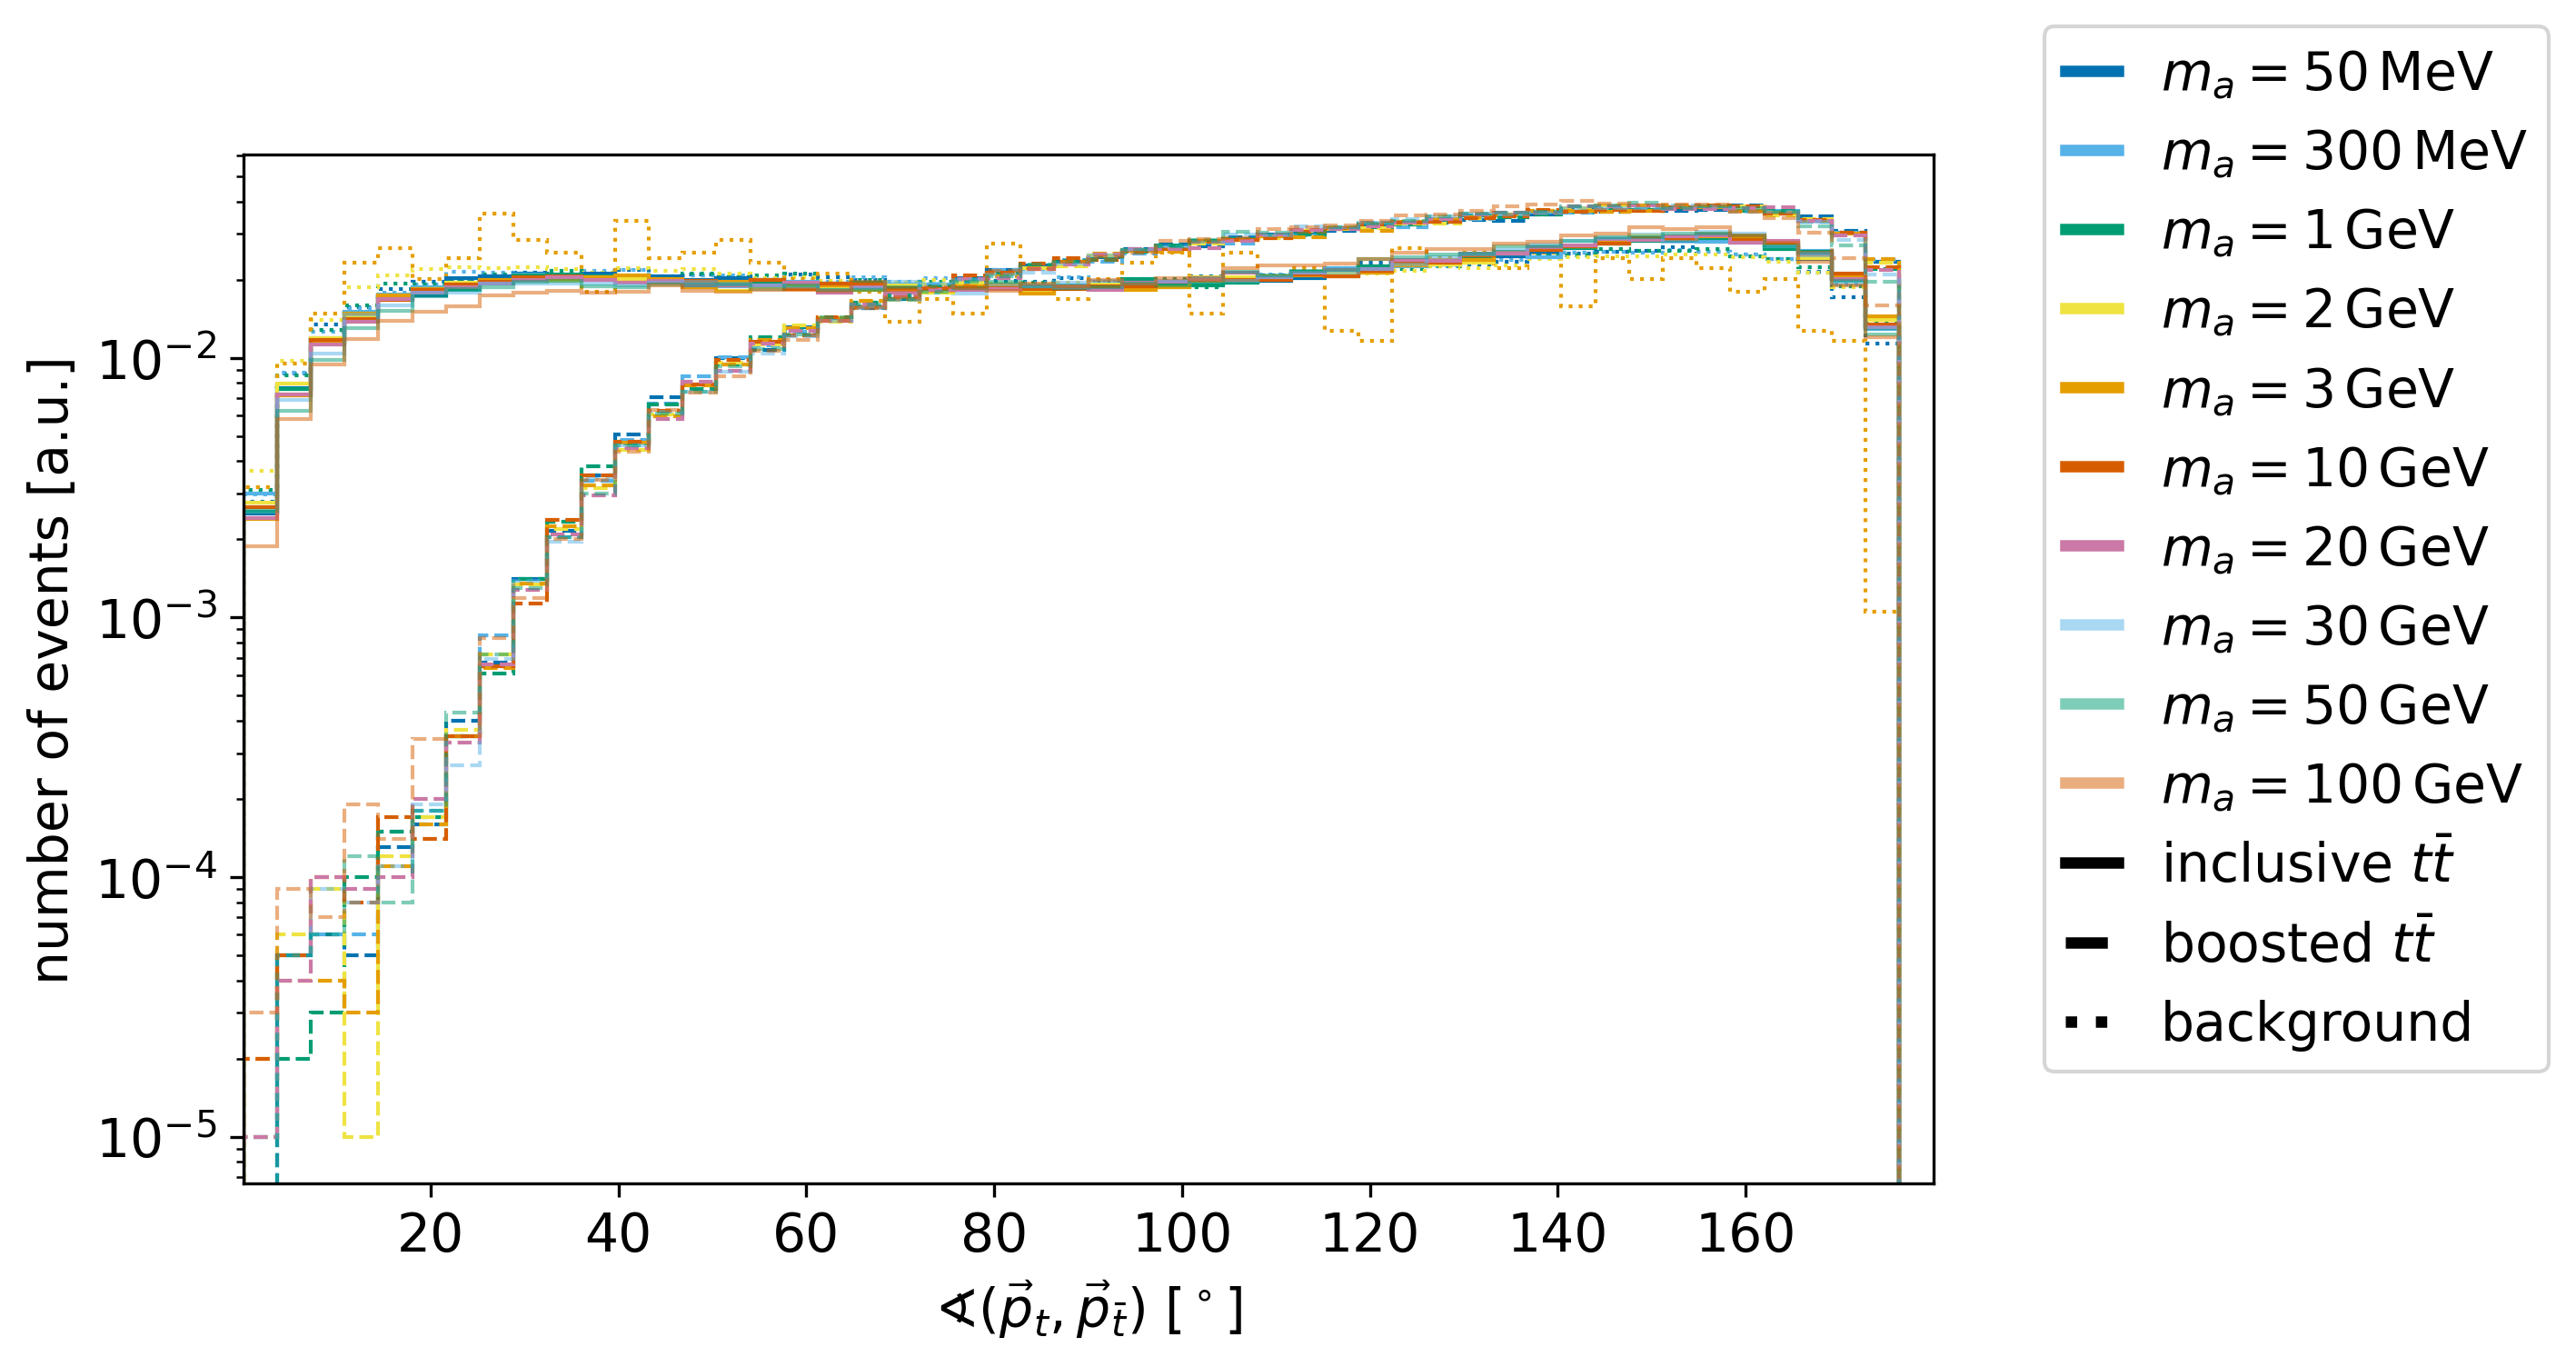

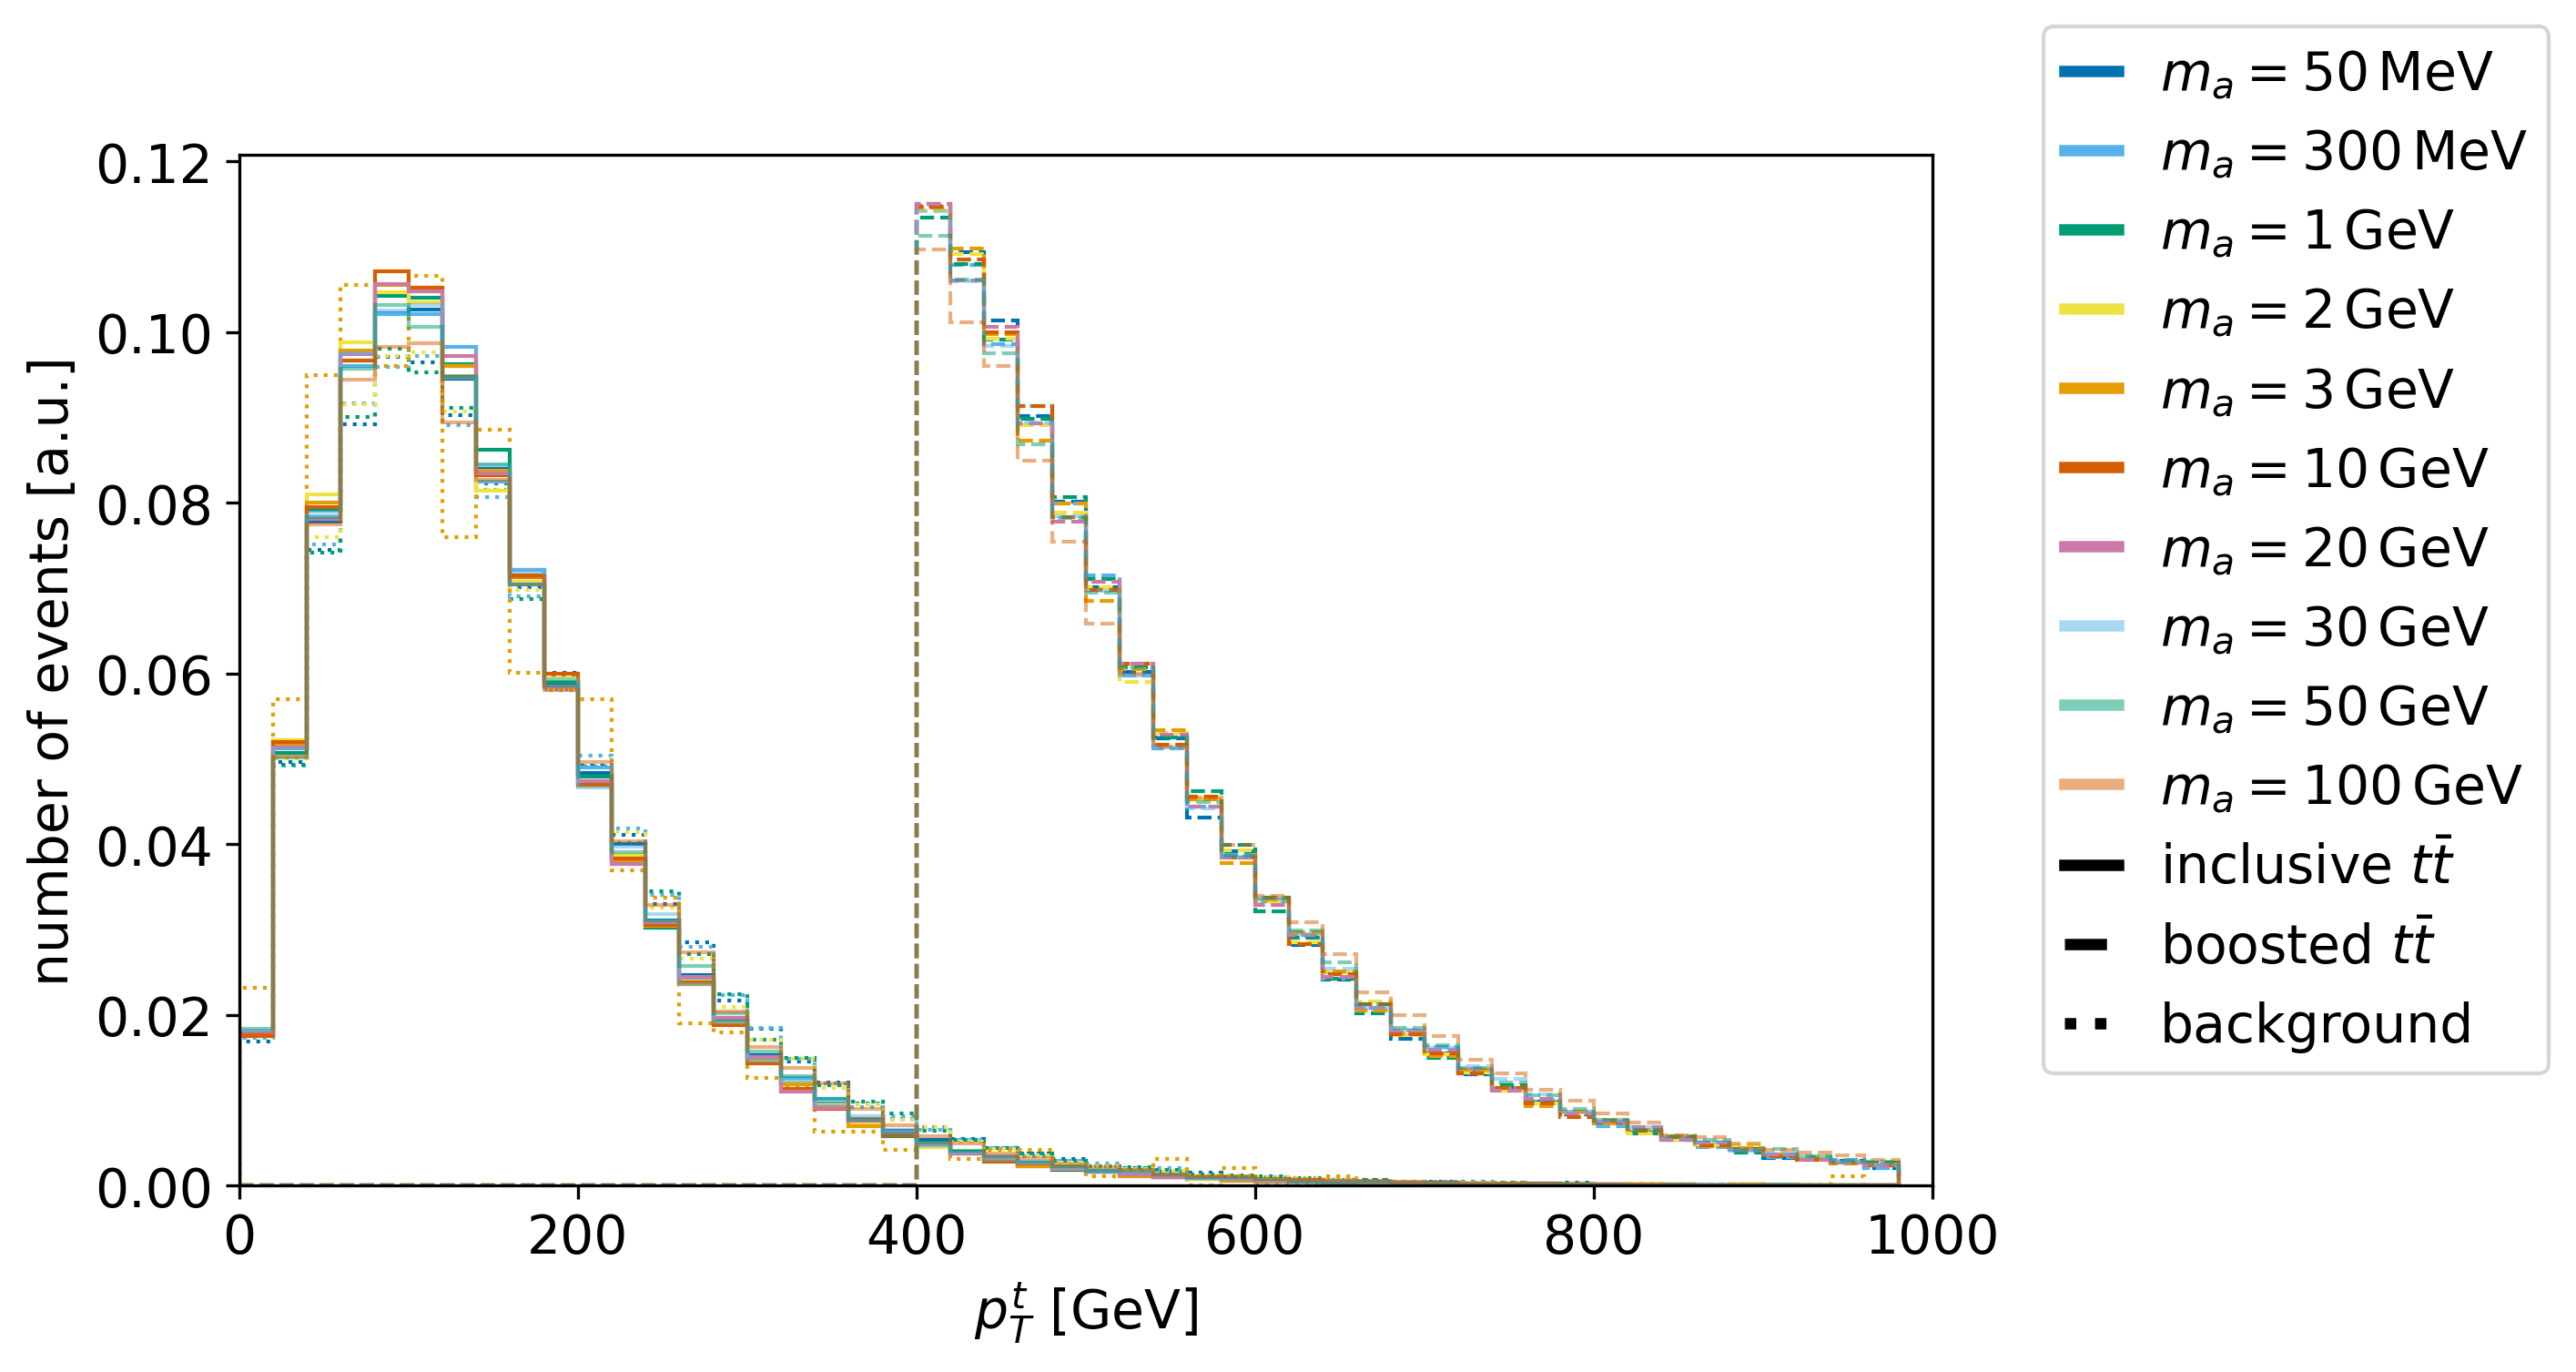

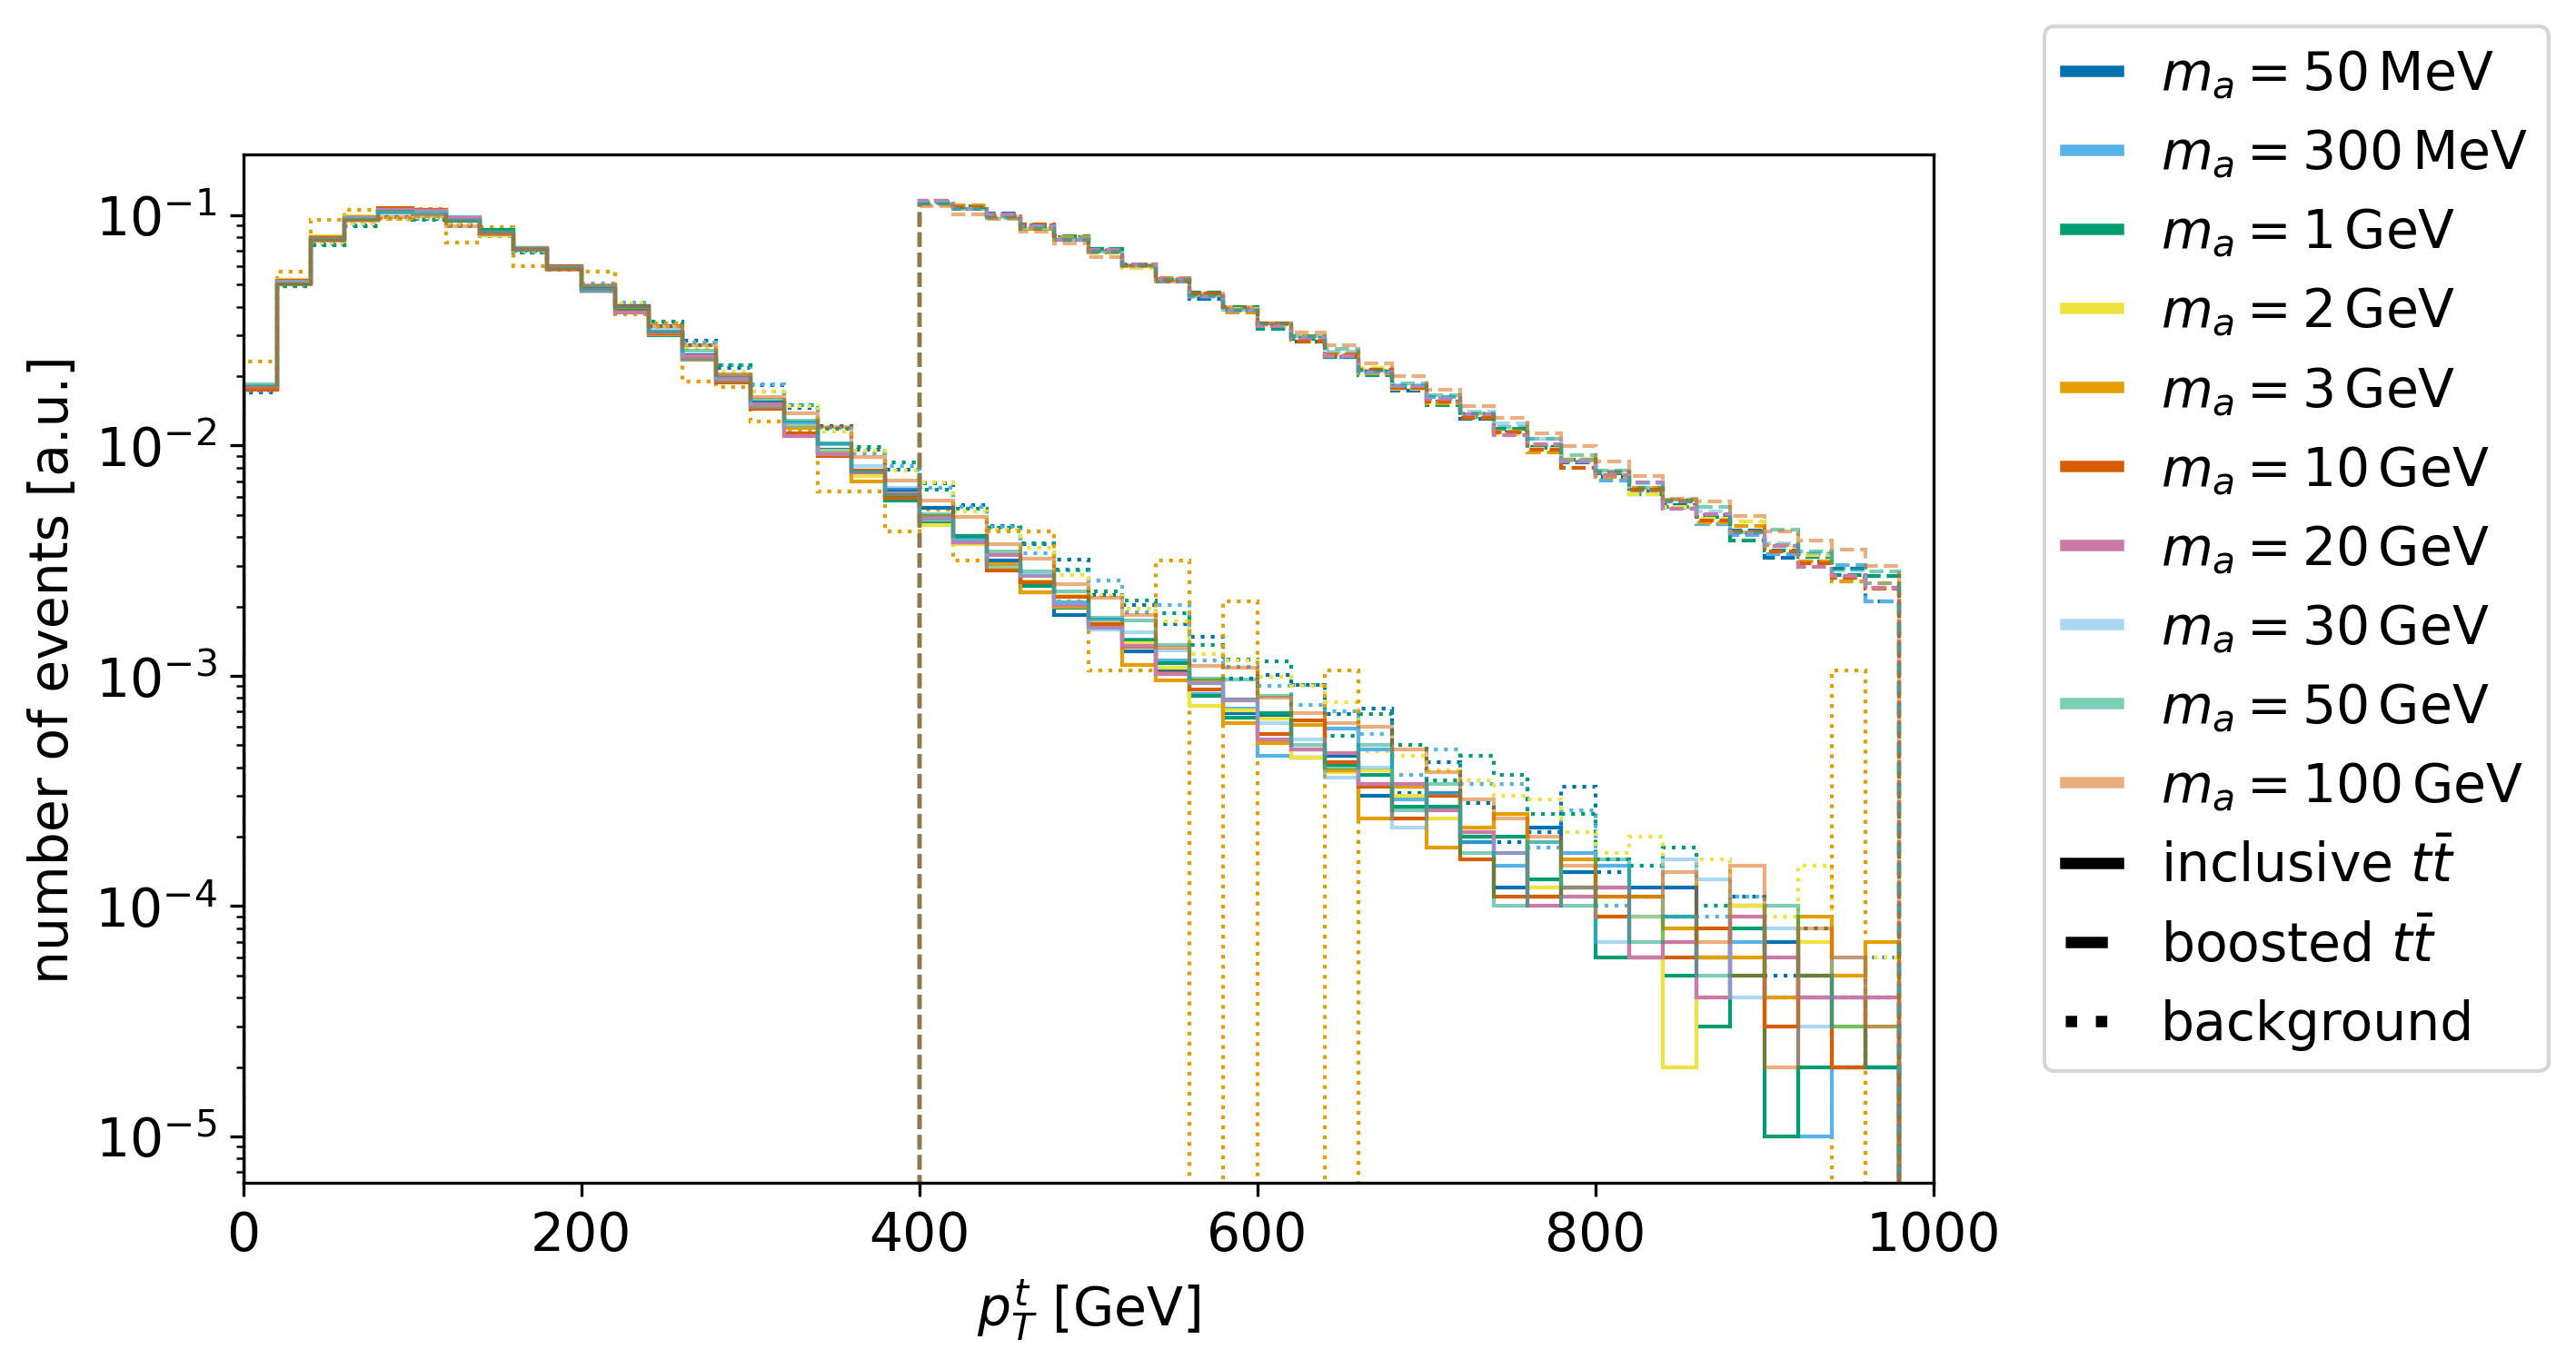

In [ ]:
# kinematics of the inclusive and boosted signal events and the ttmumu+ttj background events
mypl.hist1dcomp(data("inv_mass",["top","antitop"],"incl"), data("inv_mass",["top","antitop"],"boost"), data("inv_mass",["top","antitop"],"bkg"),massLabels,dirLabel["mtt"],outputpath+"mtt_cwb_ttj_lin.png",customXlim=[0,2000],customXlabels=labels_bkg, log_scale=False)
mypl.hist1dcomp(data("inv_mass",["top","antitop"],"incl"), data("inv_mass",["top","antitop"],"boost"), data("inv_mass",["top","antitop"],"bkg"),massLabels,dirLabel["mtt"],outputpath+"mtt_cwb_ttj_log.png",customXlim=[0,2000],customXlabels=labels_bkg, log_scale=True)
#mypl.hist1dcompden(data("inv_mass",["top","antitop"],"incl"),data("inv_mass",["top","antitop"],"bkg"),data("inv_mass",["top","antitop"],"ttj"),massLabels,dirLabel["mtt"],outputpath+"mtt_cwb_ttj_den.png",customXlim=[0,2000],customXlabels=labels_bkg)
mypl.hist1dcomp(data("oA",["top","antitop"],"incl"),data("oA",["top","antitop"],"boost"),data("oA",["top","antitop"],"bkg"),massLabels,dirLabel["oA_tat"],outputpath+"Angle_TopAntiTop_cwb_lin.png",customXlabels=labels_bkg)
mypl.hist1dcomp(data("oA",["top","antitop"],"incl"),data("oA",["top","antitop"],"boost"),data("oA",["top","antitop"],"bkg"),massLabels,dirLabel["oA_tat"],outputpath+"Angle_TopAntiTop_cwb_log.png",customXlabels=labels_bkg, log_scale = True)
#mypl.hist1dcomp(data("oA",["top","antitop"],"incl"),data("oA",["top","antitop"],"bkg"),data("oA",["top","antitop"],"ttj"),massLabels,dirLabel["oA_tat"],outputpath+"Angle_TopAntiTop_cwb_ttj.png",customXlabels=labels_bkg)
mypl.hist1dcomp(data("pT",["top"],"incl"),data("pT",["top"],"boost"),data("pT",["top"],"bkg"),massLabels,dirLabel["pT_t"],outputpath+"Top_pT_cwb_ttj_lin.png",customXlim=[0,1000],customXlabels=labels_bkg)
mypl.hist1dcomp(data("pT",["top"],"incl"),data("pT",["top"],"boost"),data("pT",["top"],"bkg"),massLabels,dirLabel["pT_t"],outputpath+"Top_pT_cwb_ttj_log.png",customXlim=[0,1000],customXlabels=labels_bkg, log_scale = True)
mypl.hist1dcomp(data("pT",["muon"],"incl"),data("pT",["muon"],"boost"),data("pT",["muon"],"bkg"),massLabels,dirLabel["pT_mu"],outputpath+"Muon_pT_cwb_lin.png",customXlim=[0,1000],customXlabels=labels_bkg)
mypl.hist1dcomp(data("pT",["muon"],"incl"),data("pT",["muon"],"boost"),data("pT",["muon"],"bkg"),massLabels,dirLabel["pT_mu"],outputpath+"Muon_pT_cwb_log.png",customXlim=[0,1000],customXlabels=labels_bkg, log_scale = True)
mypl.hist1dcomp(data("oA",["antimuon","muon"],"incl"),data("oA",["antimuon","muon"],"boost"),data("oA",["antimuon","muon"],"bkg"),massLabels,dirLabel["oA_muons"],outputpath+"Angle_Muons_cwb_lin.png",customXlabels=labels_bkg)
mypl.hist1dcomp(data("oA",["antimuon","muon"],"incl"),data("oA",["antimuon","muon"],"boost"),data("oA",["antimuon","muon"],"bkg"),massLabels,dirLabel["oA_muons"],outputpath+"Angle_Muons_cwb_log.png",customXlabels=labels_bkg, log_scale = True)

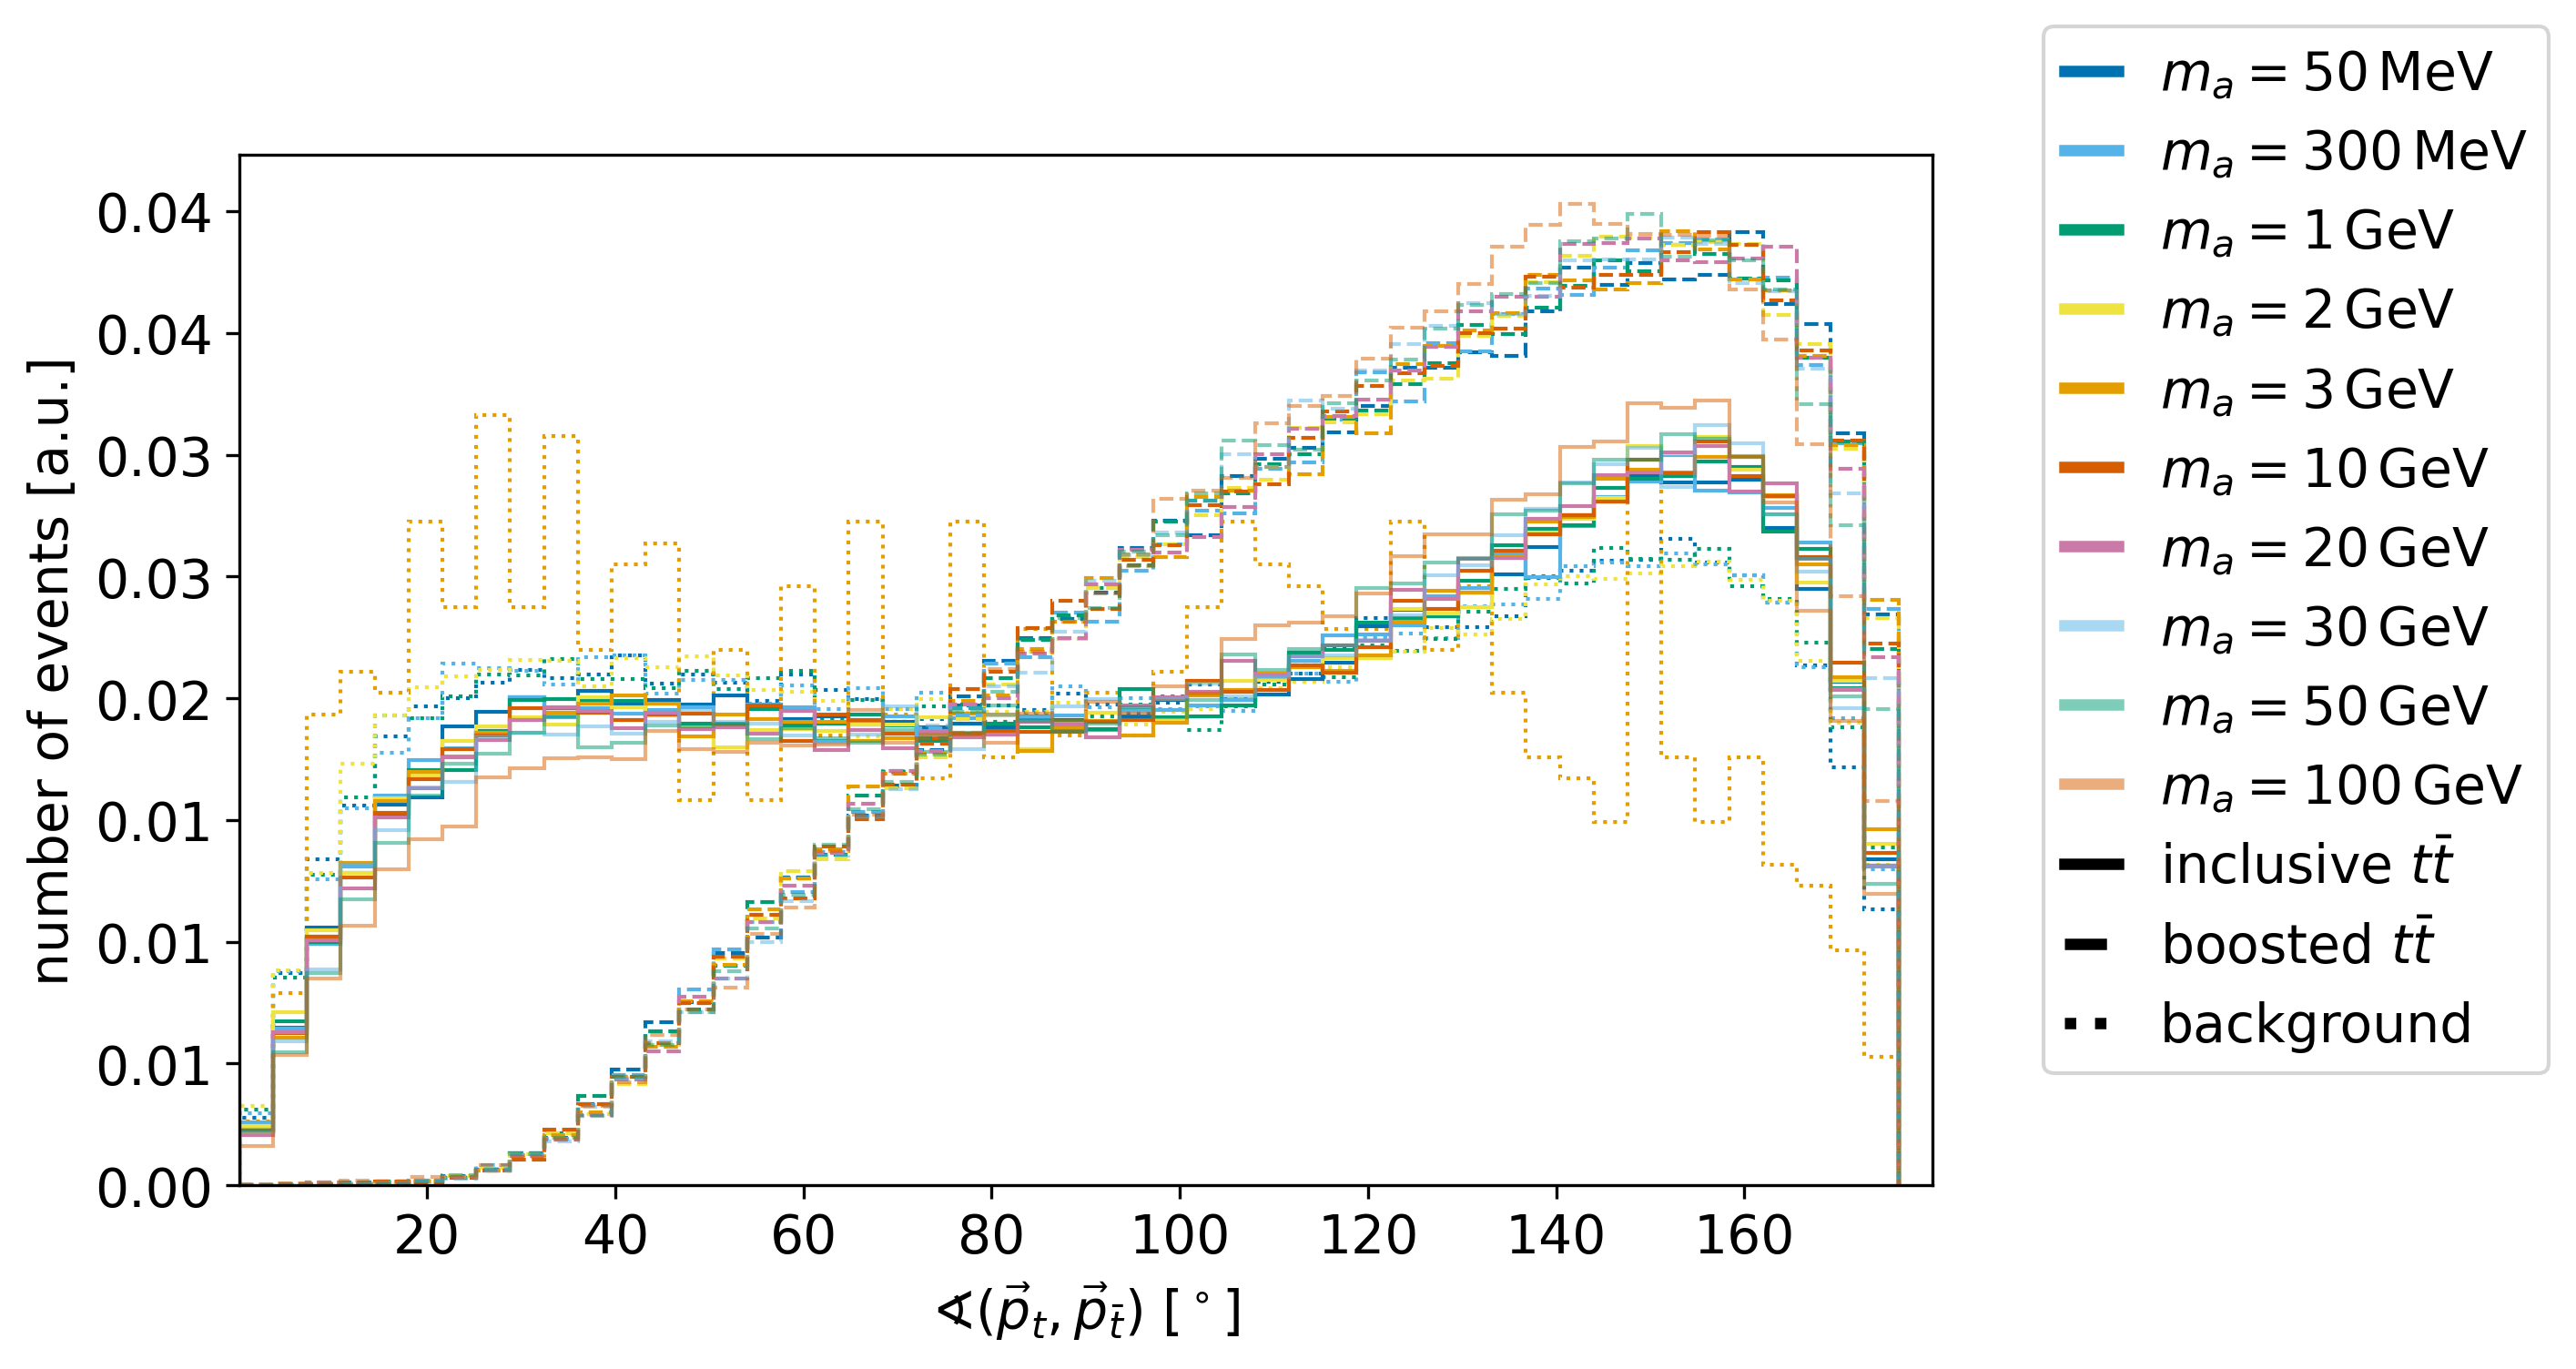

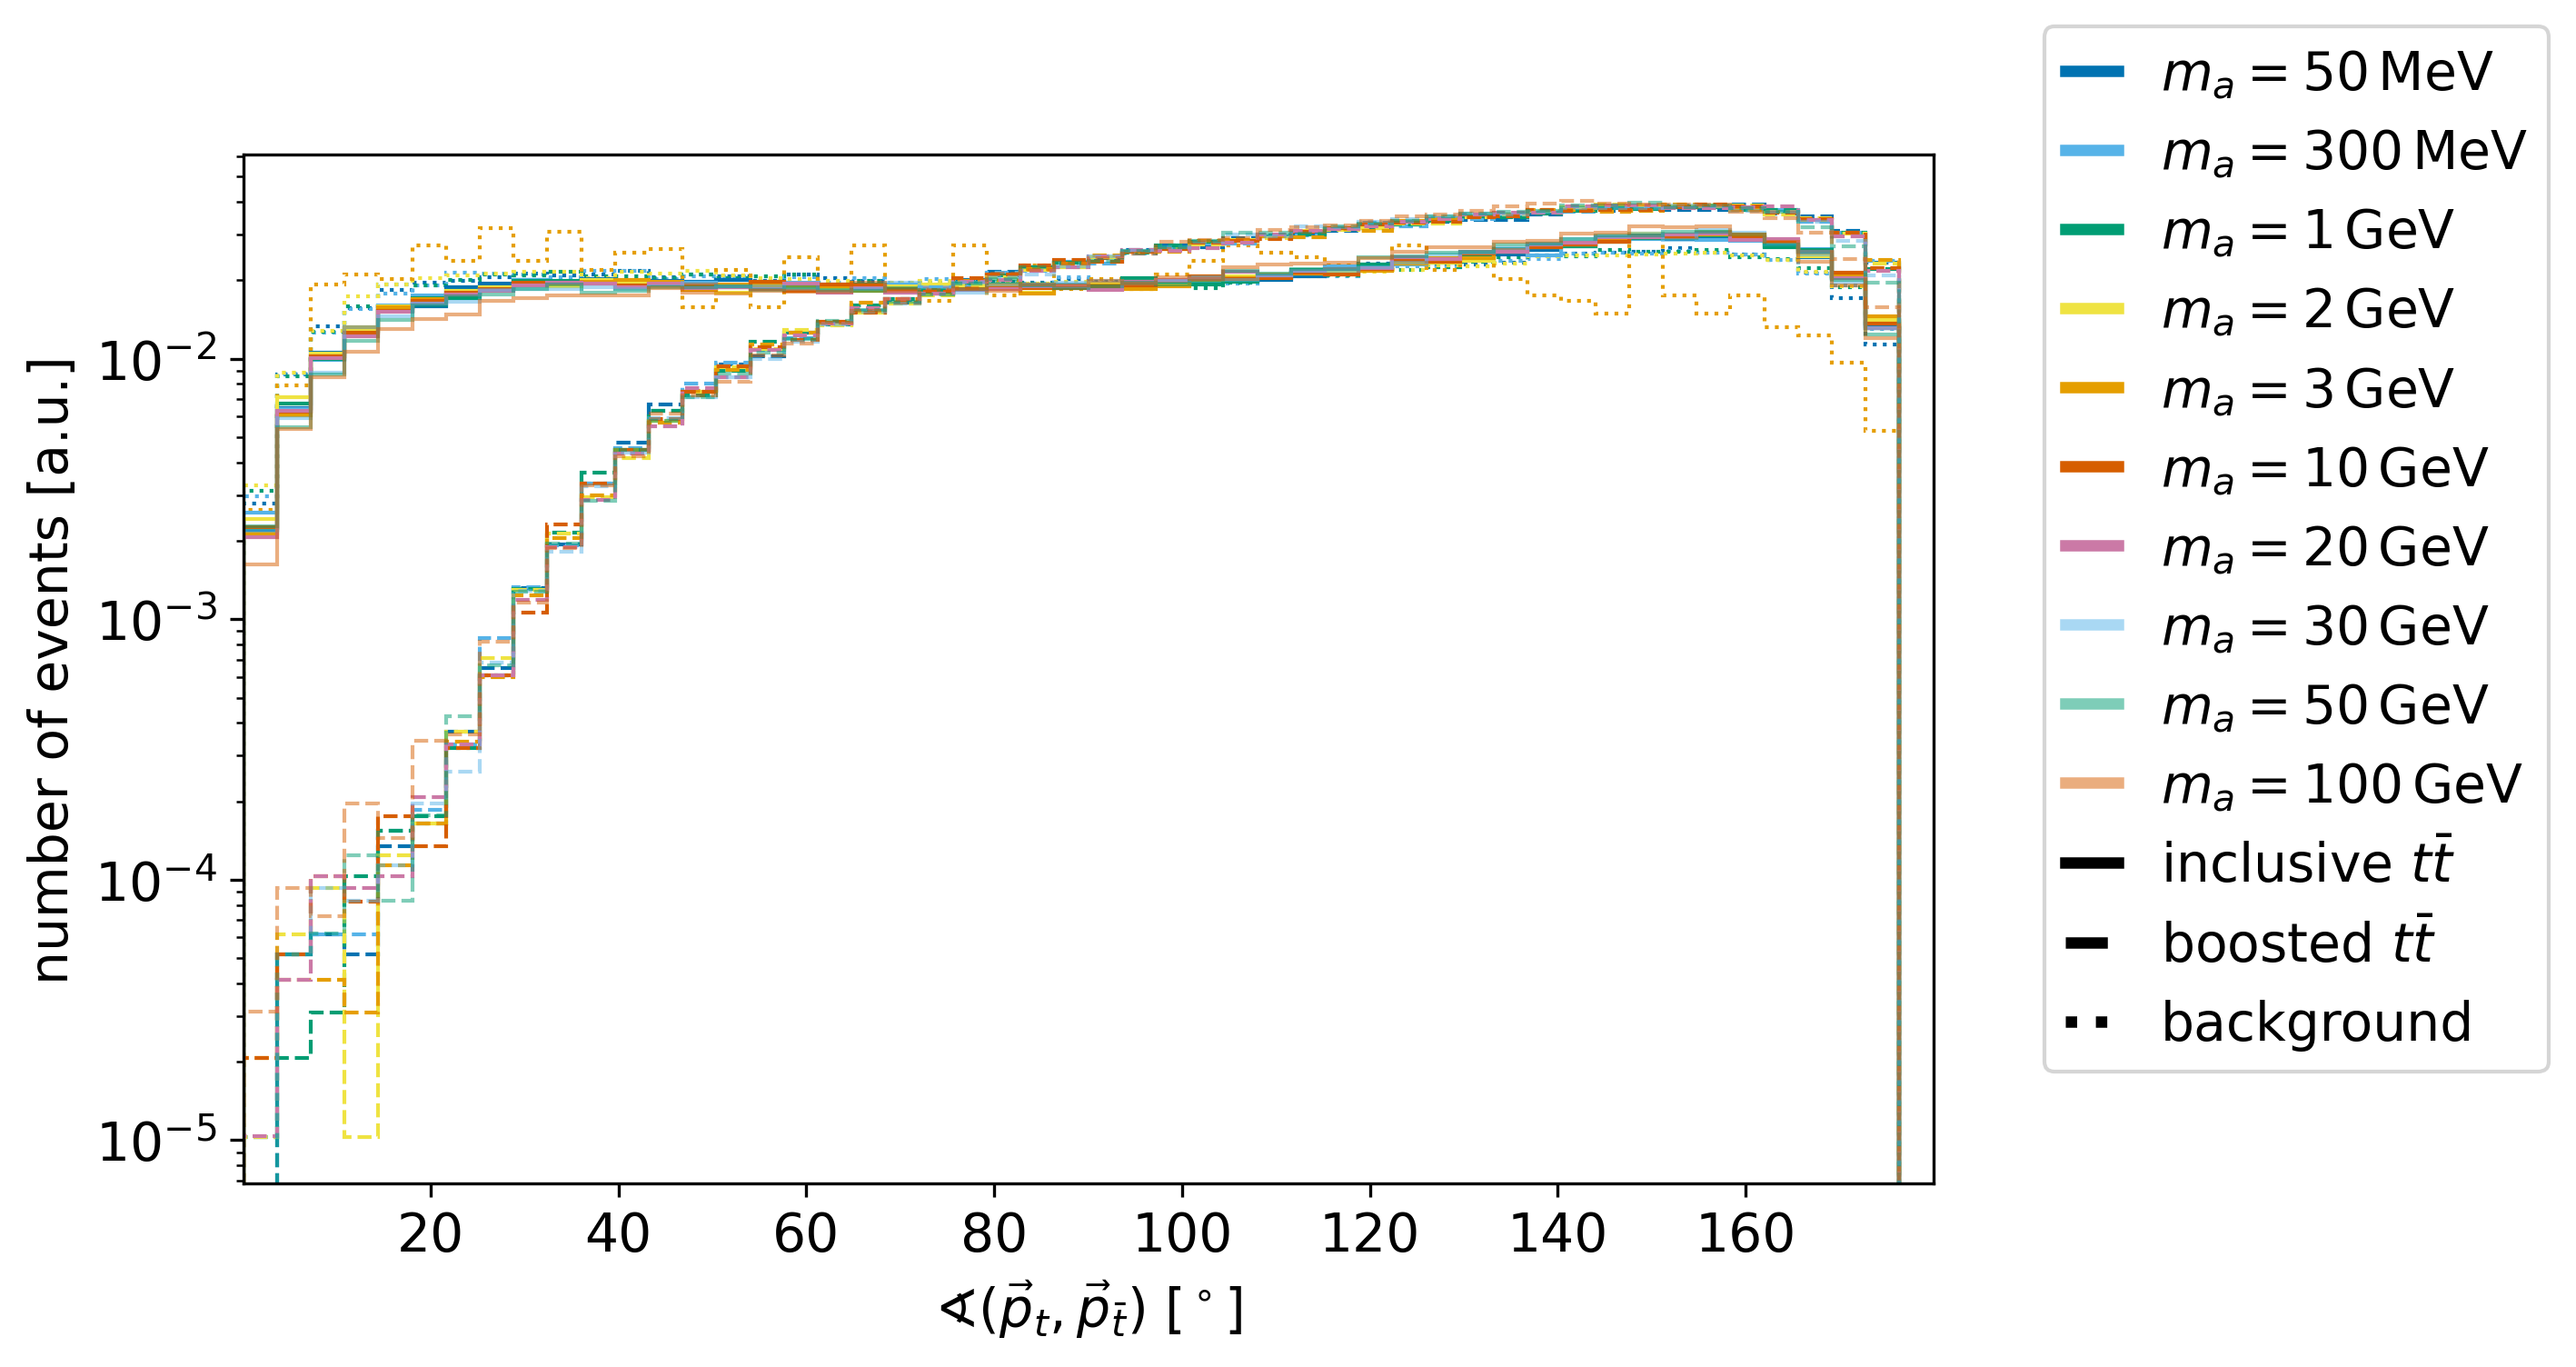

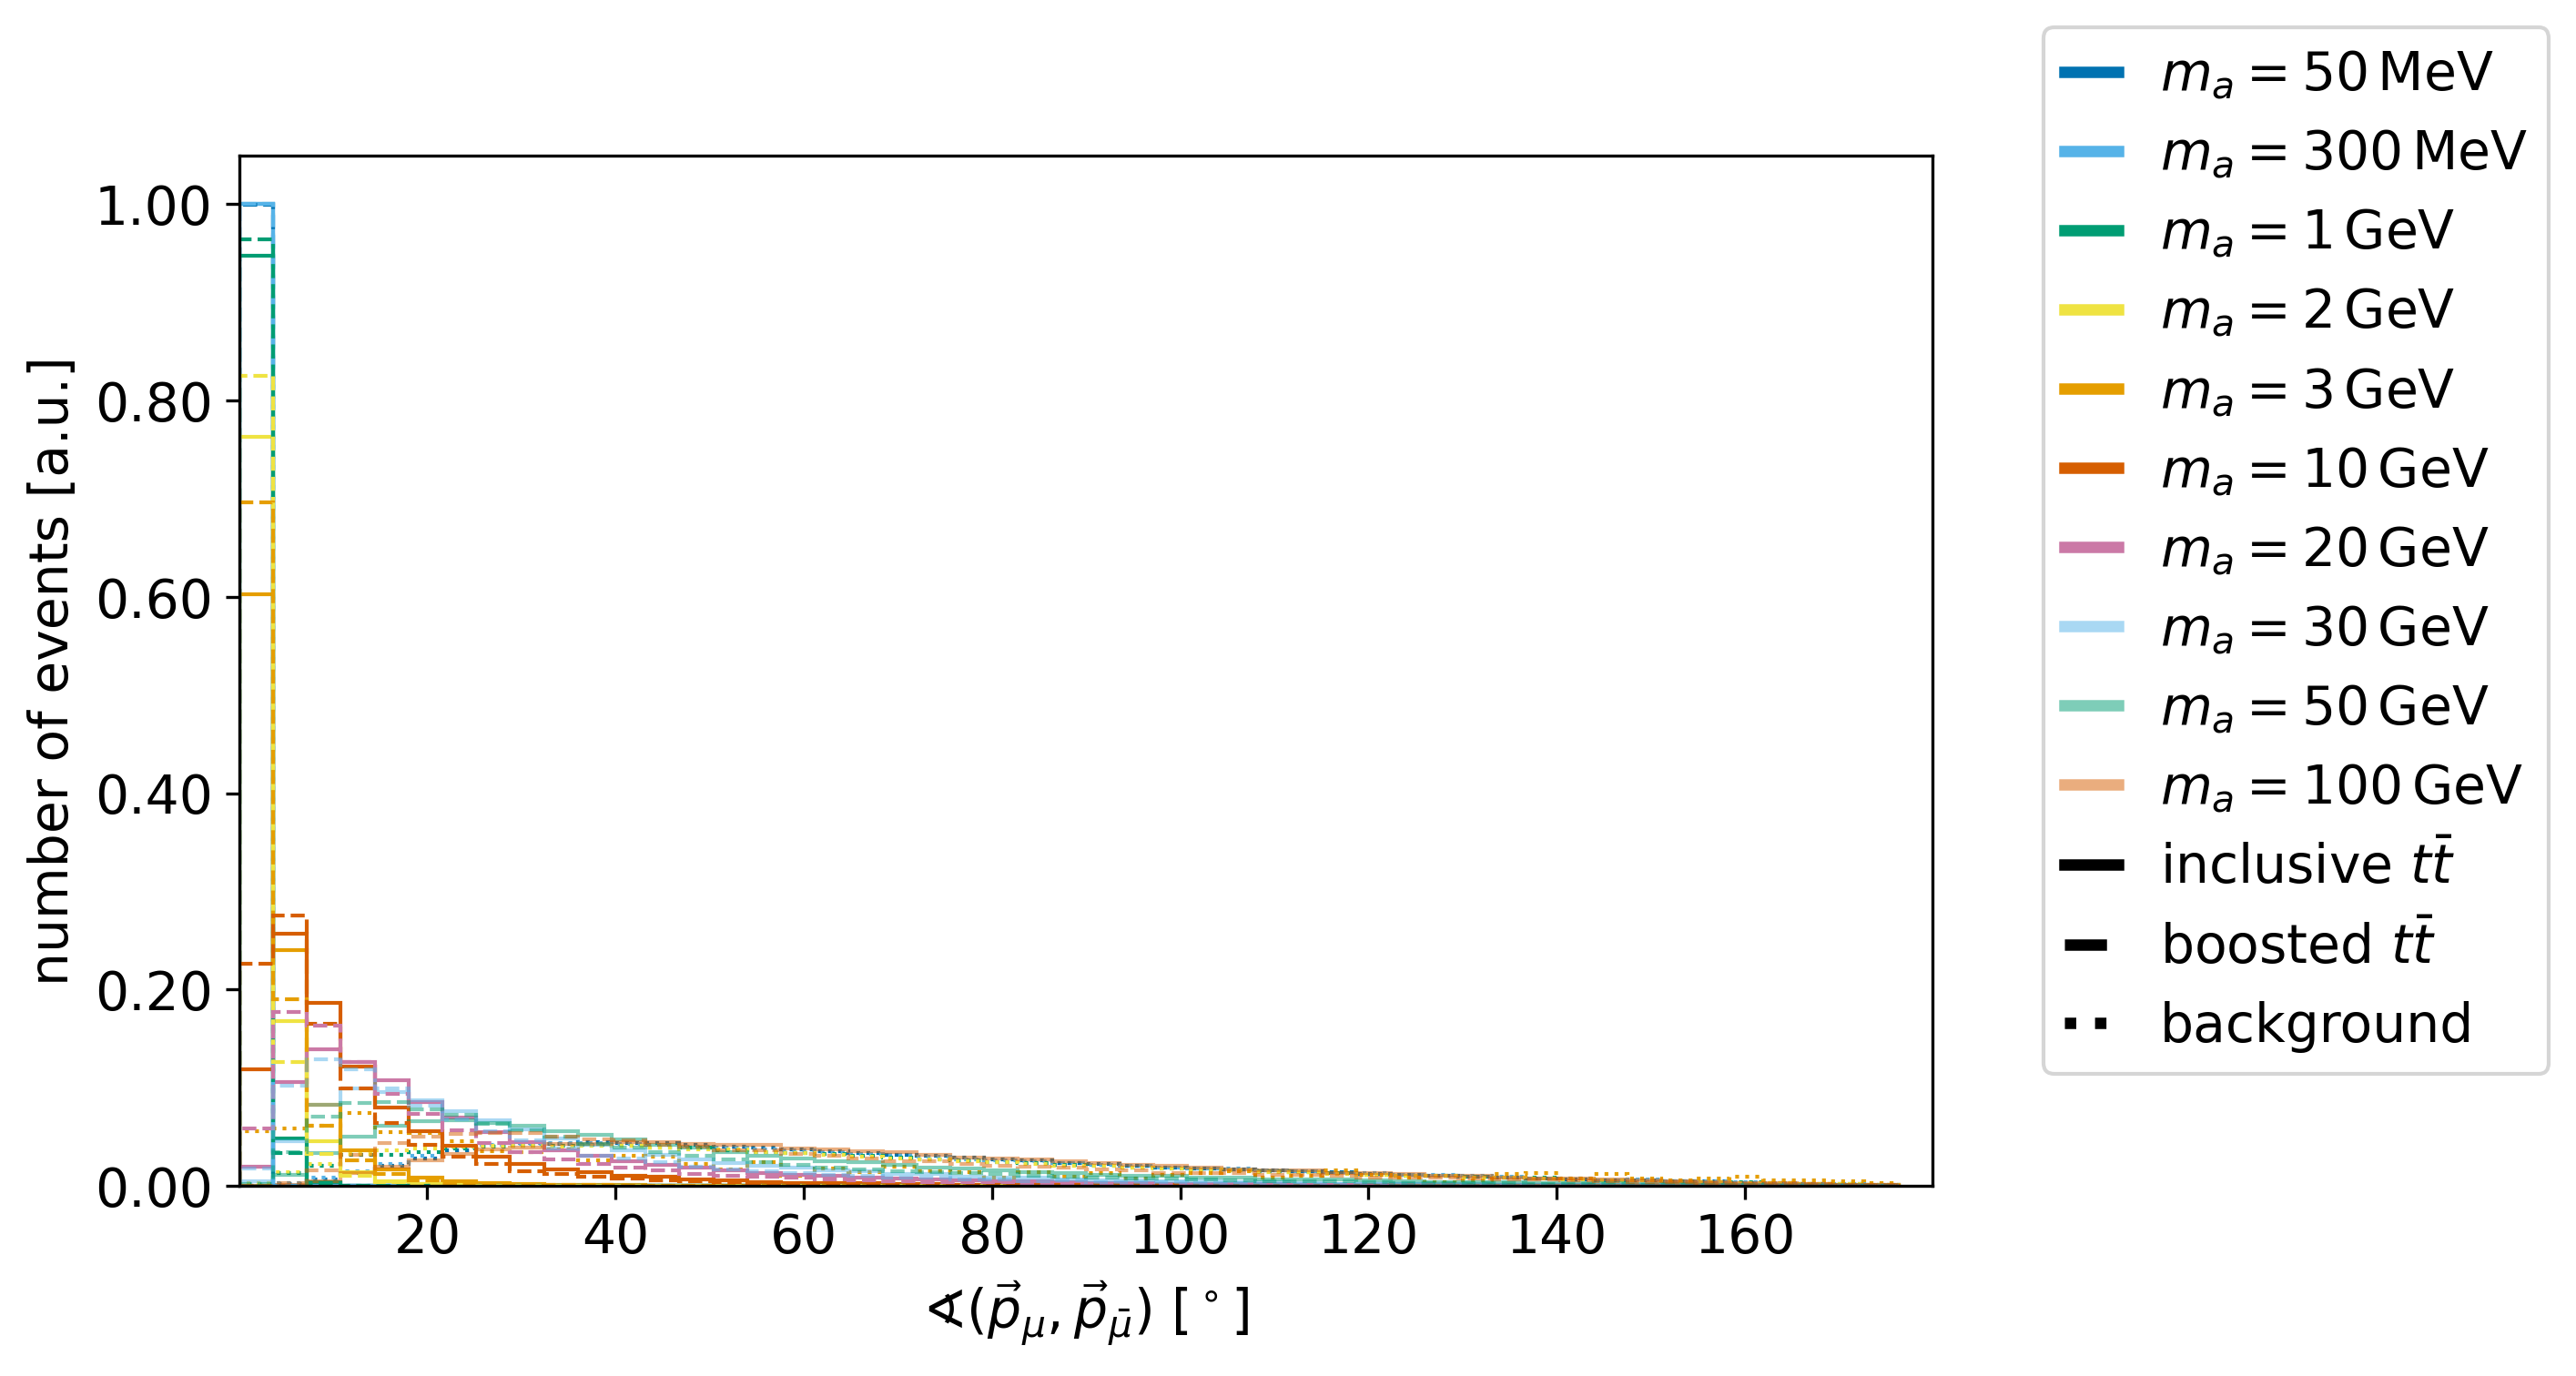

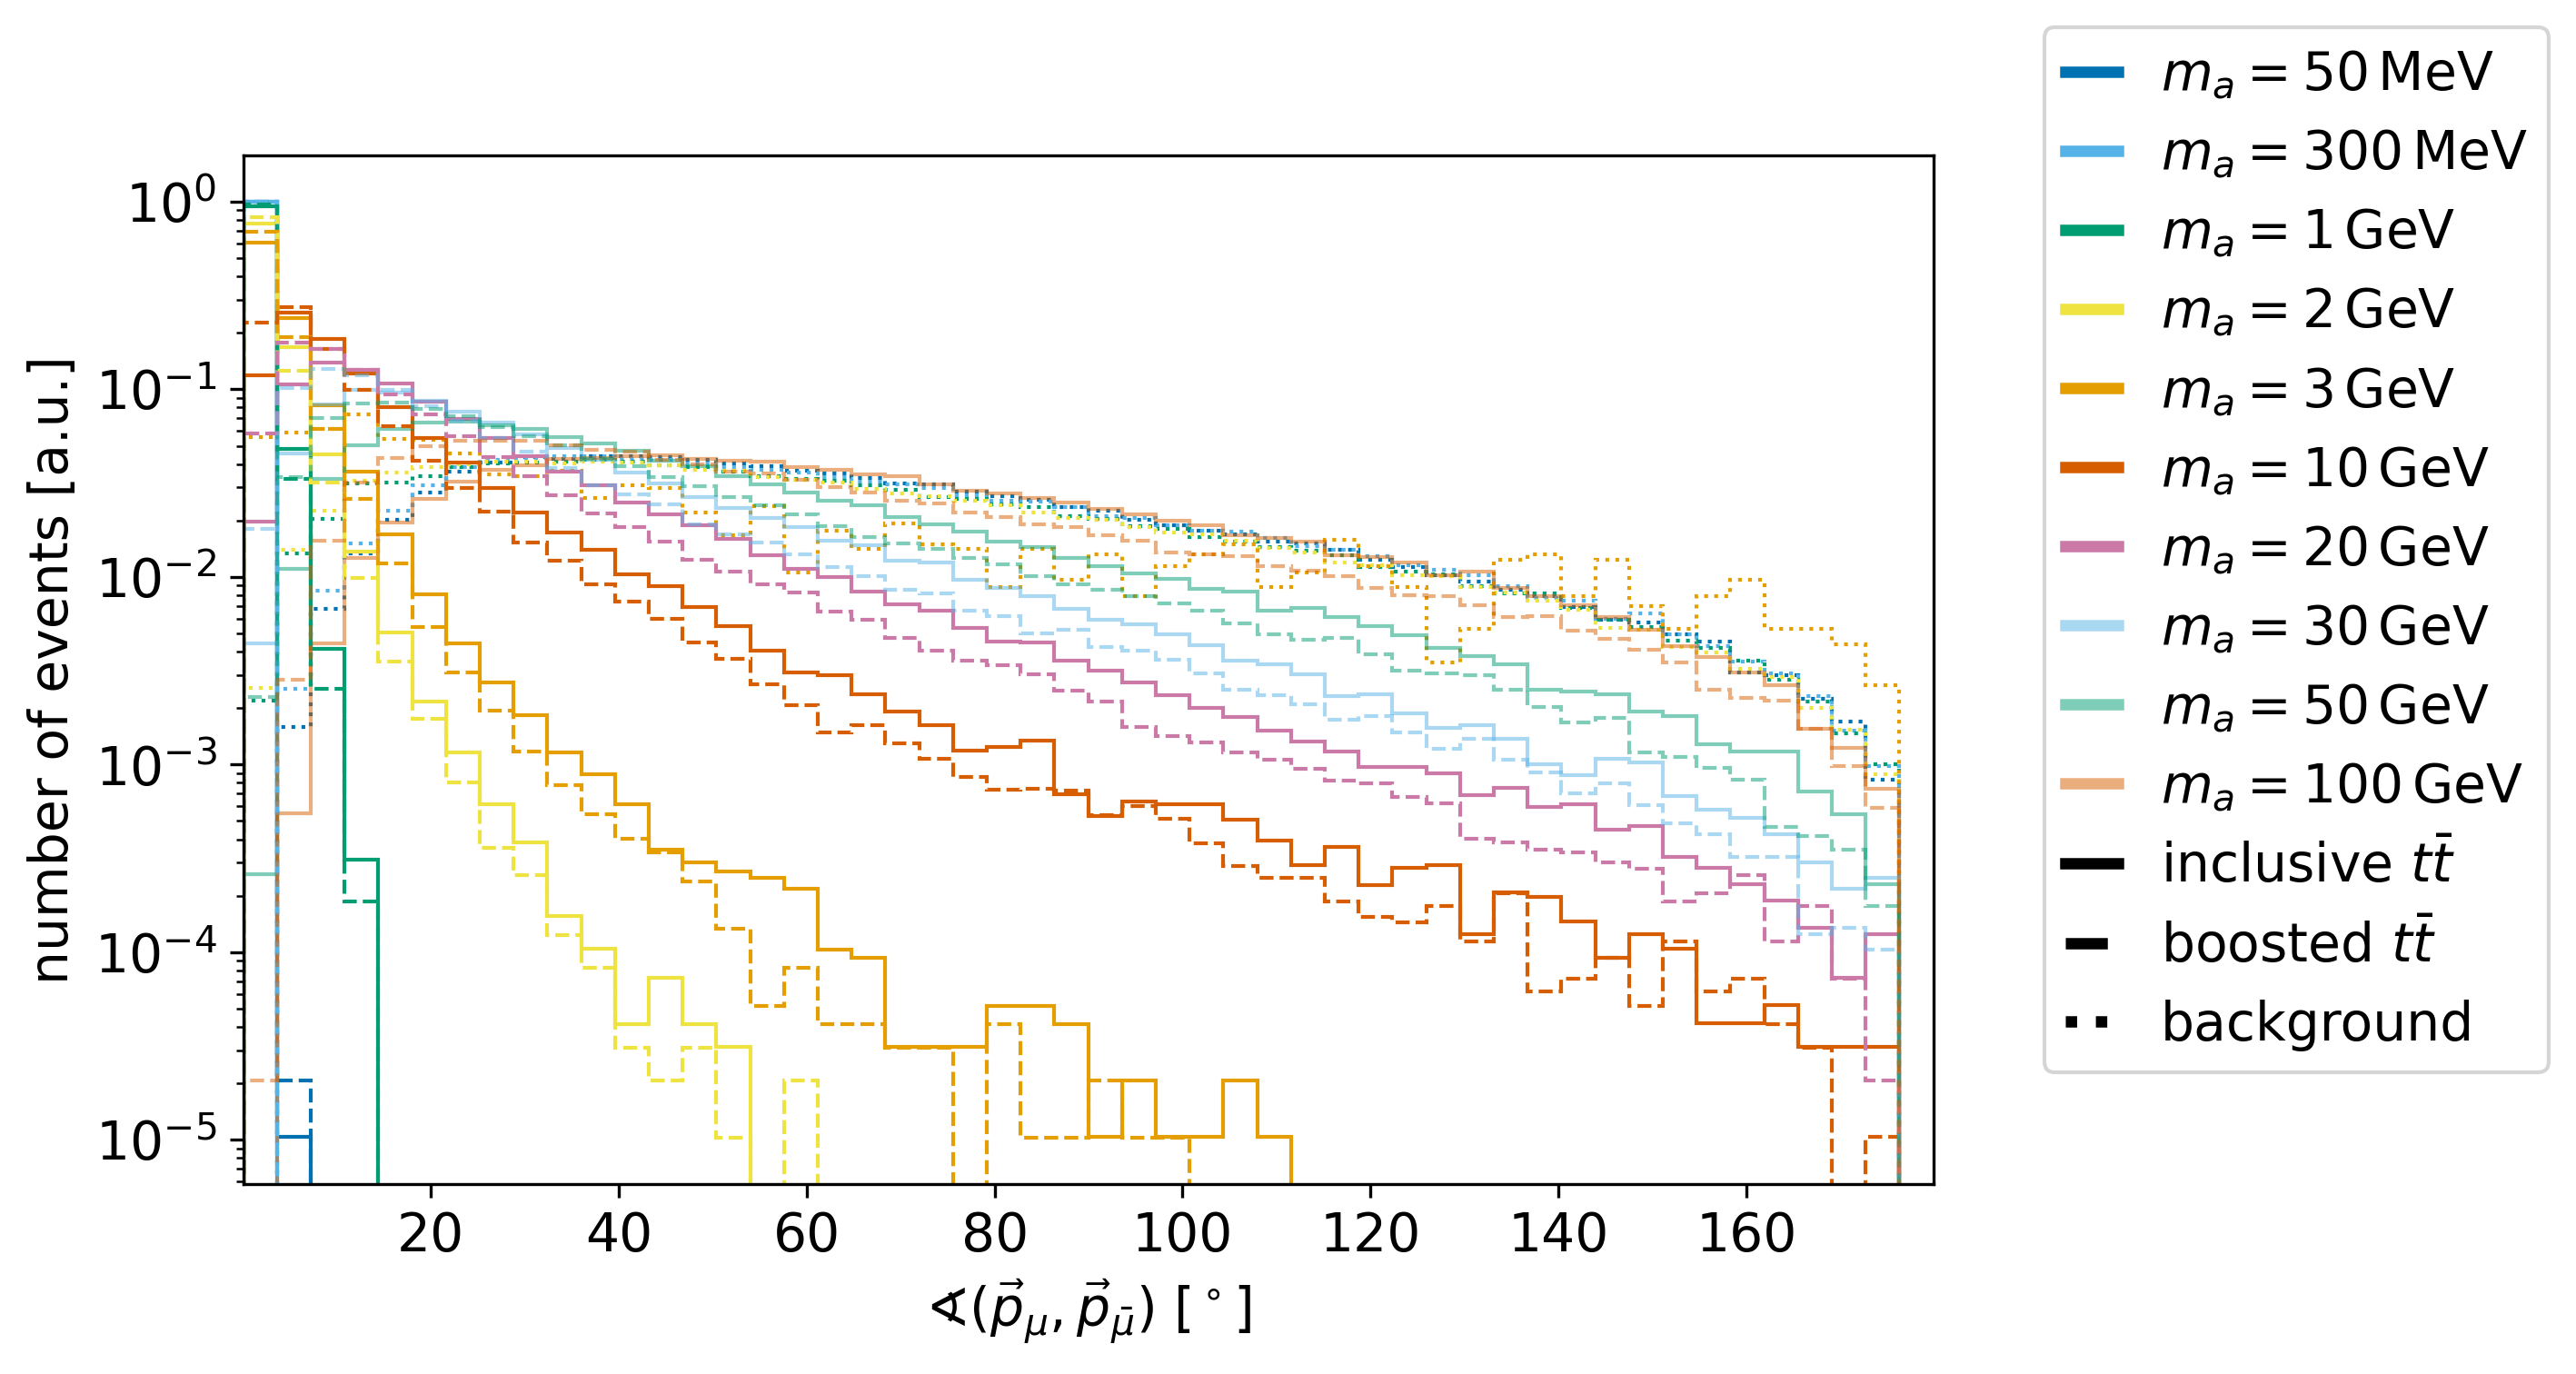

In [27]:
#mypl.hist1dcomp(data("oA",["top","antitop"],"incl"),data("oA",["top","antitop"],"boost"),data("oA",["top","antitop"],"bkg"),massLabels,dirLabel["oA_tat"],outputpath+"Angle_TopAntiTop_cwb_lin.png",customXlabels=labels_bkg)
#mypl.hist1dcomp(data("oA",["top","antitop"],"incl"),data("oA",["top","antitop"],"boost"),data("oA",["top","antitop"],"bkg"),massLabels,dirLabel["oA_tat"],outputpath+"Angle_TopAntiTop_cwb_log.png",customXlabels=labels_bkg, log_scale = True)
mypl.hist1dcomp(data("oA",["antimuon","muon"],"incl"),data("oA",["antimuon","muon"],"boost"),data("oA",["antimuon","muon"],"bkg"),massLabels,dirLabel["oA_muons"],outputpath+"Angle_Muons_cwb_lin.png",customXlabels=labels_bkg)
mypl.hist1dcomp(data("oA",["antimuon","muon"],"incl"),data("oA",["antimuon","muon"],"boost"),data("oA",["antimuon","muon"],"bkg"),massLabels,dirLabel["oA_muons"],outputpath+"Angle_Muons_cwb_log.png",customXlabels=labels_bkg, log_scale = True)